# TGA-FTIR-hyphenation-tool-kit

### Determination of surface oxygen groups (SOGs) by release rate deconvolution and robustness testing

This Template Notebook requires a valid calibration (cali.xlsx) and is structured in three parts:
1. Load measurement data (incl. correction and saving)
2. Analyze a set of samples
3. Evaluate deconvolution results

Part 2 can be copied and used several times within the notebook.
Therefore, in its beginning a subset from the measurements is selected, called objs_subset.
Results obtained during robustness testing are saved in a dictionary, called SOG_results.
This dictionary is created or loaded at the end of part 1 and updated during analysis and evaluation.

Evaluation of the analyzed objs_subset is already performed in part 2.
This includes a gas-independent condensation of the deconvolution results, taking into account limits of detections and quantification (LOD, LOQ).
Furthermore, bar graph plots are created that can be sorted either by samples or groups.

Part 3 allows to combine the results obtained in previous parts and save these constelations to SOG_results as well.

## Part 1: Load measurement data (incl. correction and saving)

In [1]:
import TGA_FTIR_tools as tir   # load the TGA-FTIR-hyphenation-tool-kit package

In [2]:
tir.samplelog()

alias  \
name                                                       
ls_6.6_16212_001                                  HK 950   
ls_6.6_16212_002                                  HK 950   
ls_6.6_16212_003                                  HK 950   
milc_17193_684                            HK 950, washed   
ls_6.6_17188_001                                HKP 1050   
ls_6.6_17188_002                                HKP 1050   
ls_6.6_17188_003                                HKP 1050   
milc_17196_682                          HKP 1050, washed   
ls_6.6_16211_002                                CCP 90 D   
ls_6.6_16211_003                                CCP 90 D   
ls_6.6_16211_005                                CCP 90 D   
ls_6.6_16211_006                                CCP 90 D   
km_210316_MilliQ+PAC_gespült_ohne_OMP    CCP 90D, washed   
ls_6.6_19036_004                               SAE Super   
ls_6.6_19036_005                               SAE Super   
milc_17197_681                         SAE Super, washed   
ls_6.6_17186_001                                5000 P-f   
milc_17194_679                          5000 P-f, washed   
ls_6.6_17187_001                                 AZ 1050   
ls_6.6_17187_002                                 AZ 1050   
ls_6.6_17187_003                                 AZ 1050   
milc_17195_680                           AZ 1050, washed   
milc_16209_653                                 PS-WP 235   
milc_16209_654                                 PS-WP 235   
milc_16209_655                                 PS-WP 235   
milc_17192_678                         PS WP 235, washed   
km_210303_19031_CC401_01                          CC 401   
km_210304_19031_CC401_Wdh_01                      CC 401   
km_210304_19031_CC401_Wdh_02                      CC 401   
milc_17191_677                            CC 401, washed   

                                                                reference  \
name                                                                        
ls_6.6_16212_001                       ls_6.6_auftriebsblindwert_002_FTIR   
ls_6.6_16212_002                       ls_6.6_auftriebsblindwert_004_FTIR   
ls_6.6_16212_003                       ls_6.6_auftriebsblindwert_005_FTIR   
milc_17193_684                            milc_auftriebsblindwert_83_FTIR   
ls_6.6_17188_001                       ls_6.6_auftriebsblindwert_010_FTIR   
ls_6.6_17188_002                       ls_6.6_auftriebsblindwert_011_FTIR   
ls_6.6_17188_003                       ls_6.6_auftriebsblindwert_011_FTIR   
milc_17196_682                            milc_auftriebsblindwert_83_FTIR   
ls_6.6_16211_002                       ls_6.6_auftriebsblindwert_002_FTIR   
ls_6.6_16211_003                       ls_6.6_auftriebsblindwert_002_FTIR   
ls_6.6_16211_005                       ls_6.6_auftriebsblindwert_002_FTIR   
ls_6.6_16211_006                       ls_6.6_auftriebsblindwert_002_FTIR   
km_210316_MilliQ+PAC_gespült_ohne_OMP        km_210316_auftriebsblindwert   
ls_6.6_19036_004                       ls_6.6_auftriebsblindwert_006_FTIR   
ls_6.6_19036_005                       ls_6.6_auftriebsblindwert_006_FTIR   
milc_17197_681                            milc_auftriebsblindwert_83_FTIR   
ls_6.6_17186_001                       ls_6.6_auftriebsblindwert_010_FTIR   
milc_17194_679                            milc_auftriebsblindwert_82_FTIR   
ls_6.6_17187_001                       ls_6.6_auftriebsblindwert_010_FTIR   
ls_6.6_17187_002                       ls_6.6_auftriebsblindwert_011_FTIR   
ls_6.6_17187_003                       ls_6.6_auftriebsblindwert_011_FTIR   
milc_17195_680                            milc_auftriebsblindwert_83_FTIR   
milc_16209_653                            milc_auftriebsblindwert_80_FTIR   
milc_16209_654                            milc_auftriebsblindwert_80_FTIR   
milc_16209_655                            milc_auftriebsblindwert_80_FTIR   
milc_17192_678                            milc_auft

Initialization of each measurment as an object in "objs" list.
Correcting object info based on method used.
Applying TG_IR.corr() for air bouoncy correction and release rate baseline corrections.
Finally, objects are saved in Output folder and samplelog.xlsx is updated.

In [ ]:
objs=[tir.TG_IR(name) for name in tir.samplelog().index]

# lists in 'mass_steps' and 'step_temp' should be of the same length 
# and can be used to determine and save certain steps in TG_IR.info
for obj in objs:
    obj.info['mass_steps'] = ['N2_600', 'N2_1000']
    obj.info['step_temp'] = [600, 1000]

for obj in objs:
    obj.corr()
    obj.save(how = 'excel', overwrite = True)
    obj.save(how = 'pickle', overwrite = True)

If you already initialized the measurements and saved the results. Objects, including all corrections, can be quickly loaded from .pkl files located in the Output folder (dir_output).

List all TG_IR objects in objs list.

In [4]:
tir.overview(objs)

                                        name              alias
index                                                          
0                           ls_6.6_16212_001             HK 950
1                           ls_6.6_16212_002             HK 950
2                           ls_6.6_16212_003             HK 950
3                             milc_17193_684     HK 950, washed
4                           ls_6.6_17188_001           HKP 1050
5                           ls_6.6_17188_002           HKP 1050
6                           ls_6.6_17188_003           HKP 1050
7                             milc_17196_682   HKP 1050, washed
8                           ls_6.6_16211_002           CCP 90 D
9                           ls_6.6_16211_003           CCP 90 D
10                          ls_6.6_16211_005           CCP 90 D
11                          ls_6.6_16211_006           CCP 90 D
12     km_210316_MilliQ+PAC_gespült_ohne_OMP    CCP 90D, washed
13                          ls_6.6_19036

Show calibration parameter (in mmol), representative for the object with index 0 in objs list.

In [5]:
objs[0].linreg

slope  intercept   r_value       p_value   std_error
CO    435.425642  -0.417216  0.999413  5.470380e-16    4.718884
CO2  9144.378095  24.033922  0.998762  2.289272e-14  144.047985
H2O    17.169582   0.017487  0.999708  1.664116e-17    0.131185

In [ ]:
objs[0].stats

### Create a dictionary to store deconvolution results from robustness testings

In [6]:
SOG_results = {}
save_file_name = 'SOG_results_dict_template'

In [7]:
# to quickly save and load saved results, e.g. the SOG_results dictionary
import pickle

def save_dict(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_dict(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

Load existing SOG_results dictionary from file. Items will be updated during analysis.

In [11]:
SOG_results = load_dict(save_file_name)

## Part 2: Analyze a subset of the loaded measurements

Select a subset from objs list for analysis.

In [9]:
objs_subset = objs[0:4]
tir.overview(objs_subset)

                   name           alias
index                                  
0      ls_6.6_16212_001          HK 950
1      ls_6.6_16212_002          HK 950
2      ls_6.6_16212_003          HK 950
3        milc_17193_684  HK 950, washed


### TGA graphs

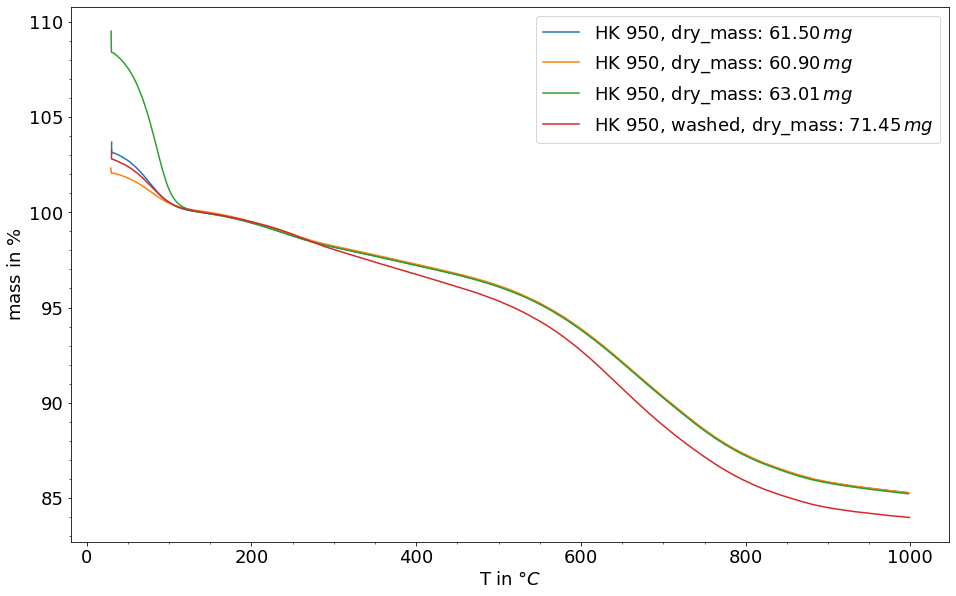

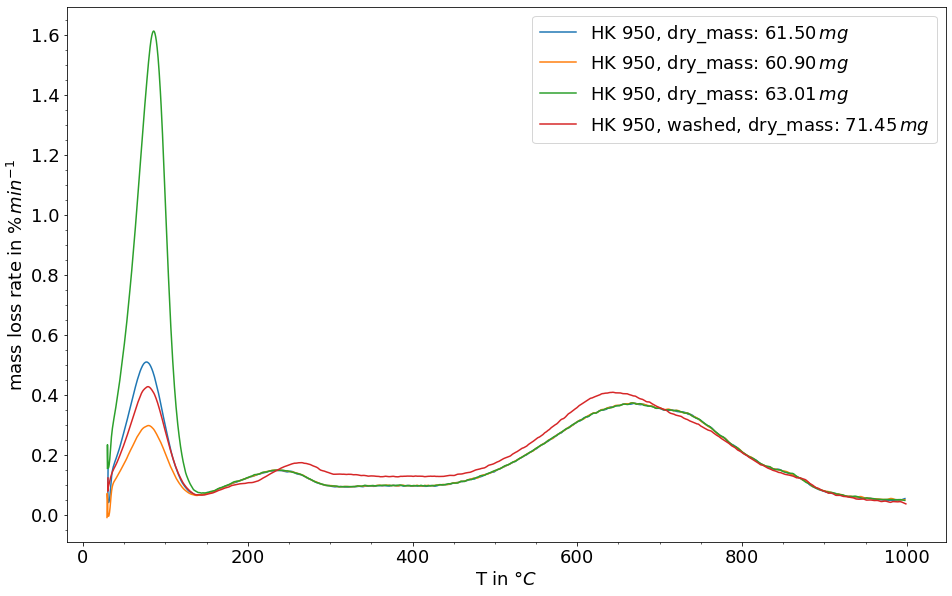

In [9]:
tir.plots(objs_subset, y_axis='rel', plot='TG')
tir.plots(objs_subset, y_axis='rel', plot='DTG')

### FTIR release rates

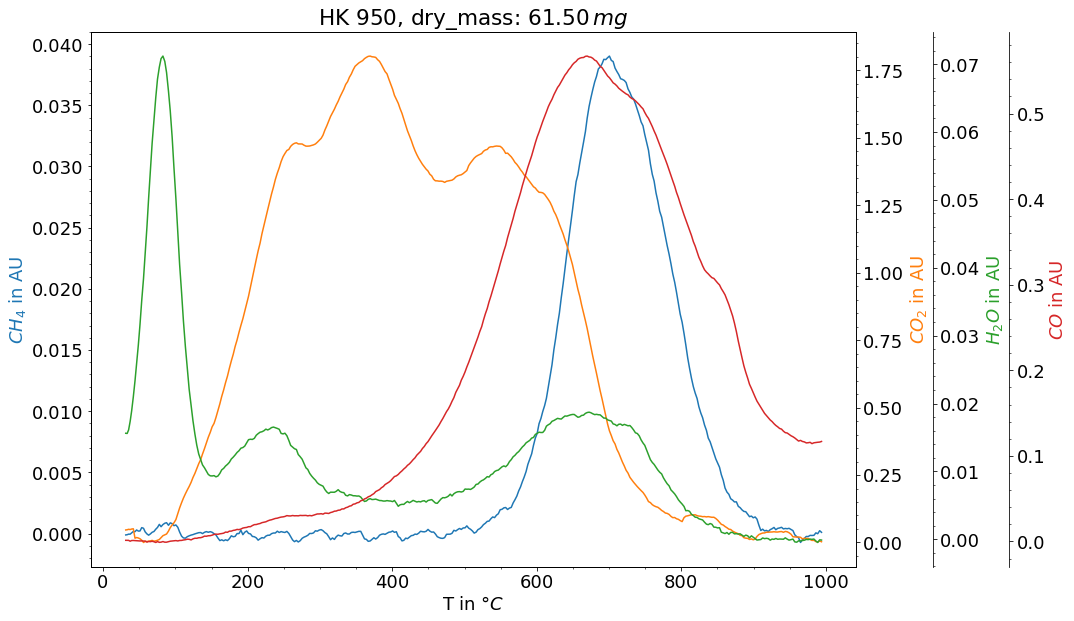

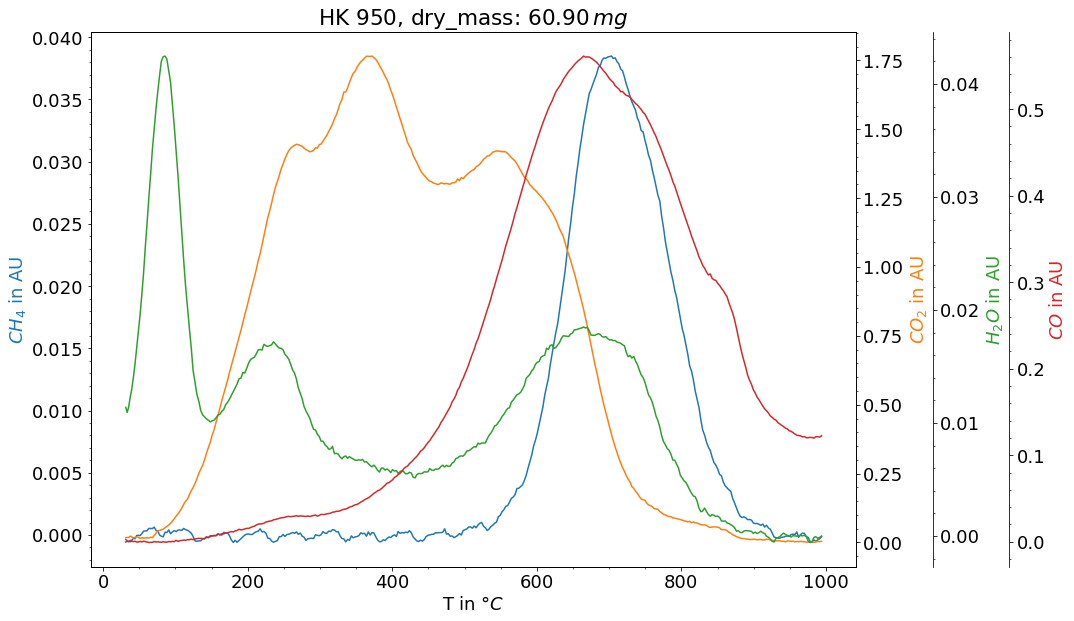

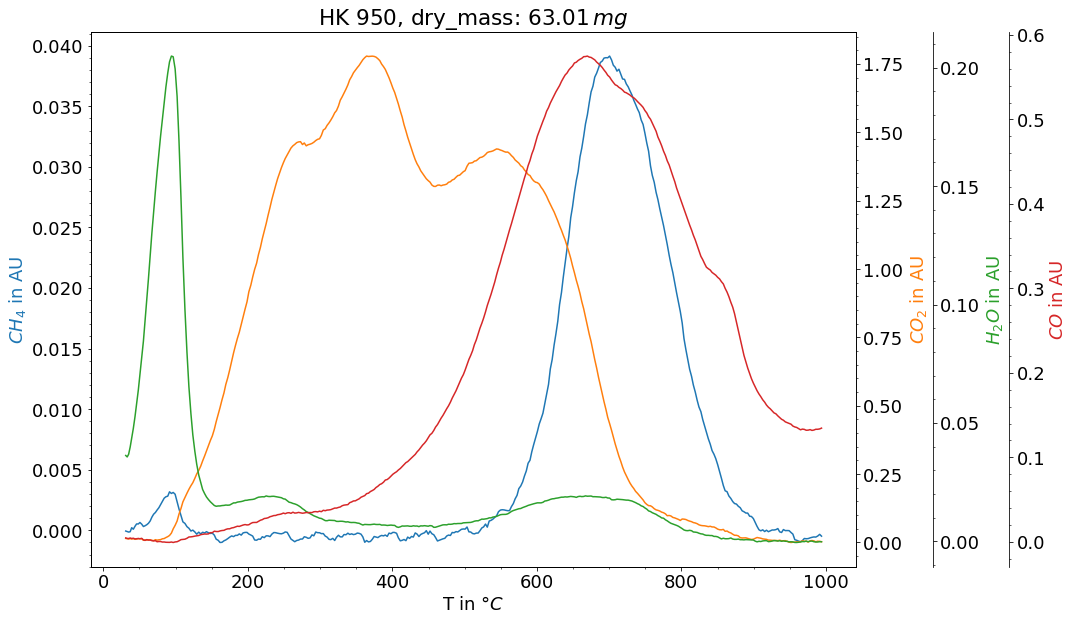

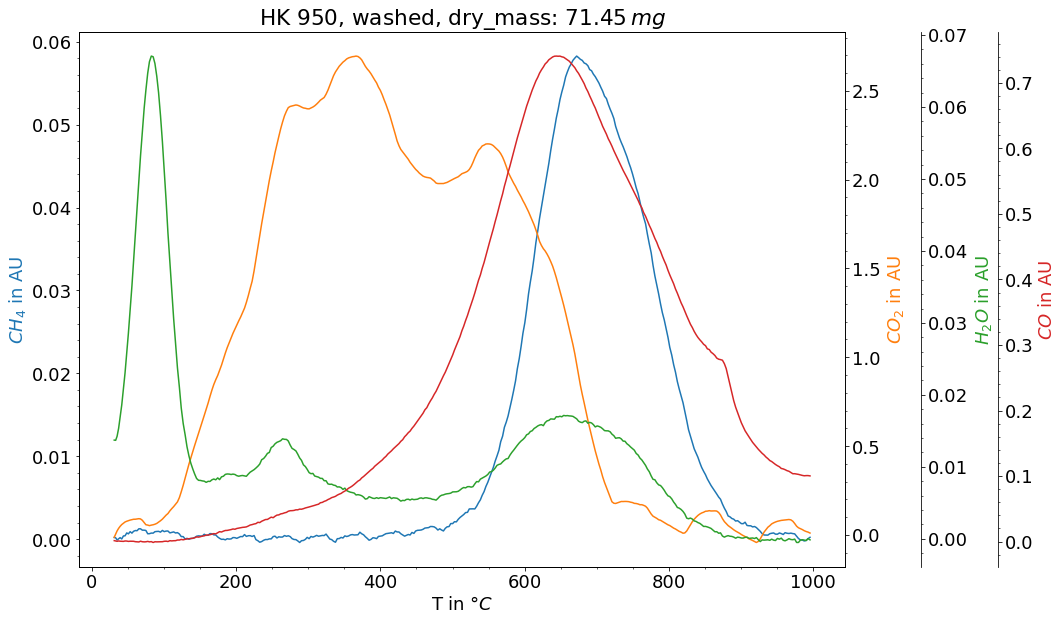

In [10]:
# plot all gases for each sample in objs_subset
for obj in objs_subset:
    obj.plot('IR', legend = False)

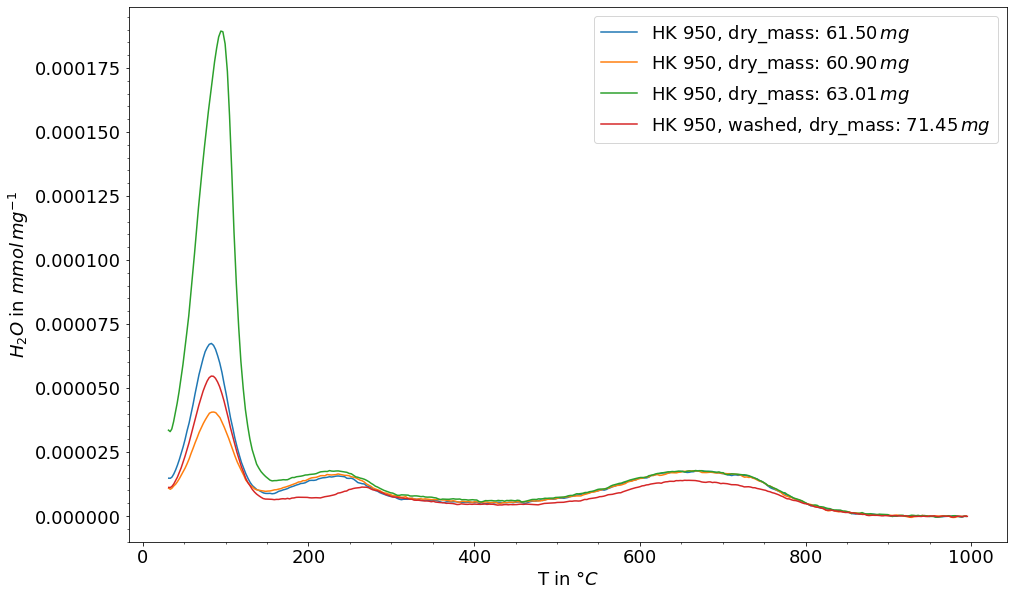

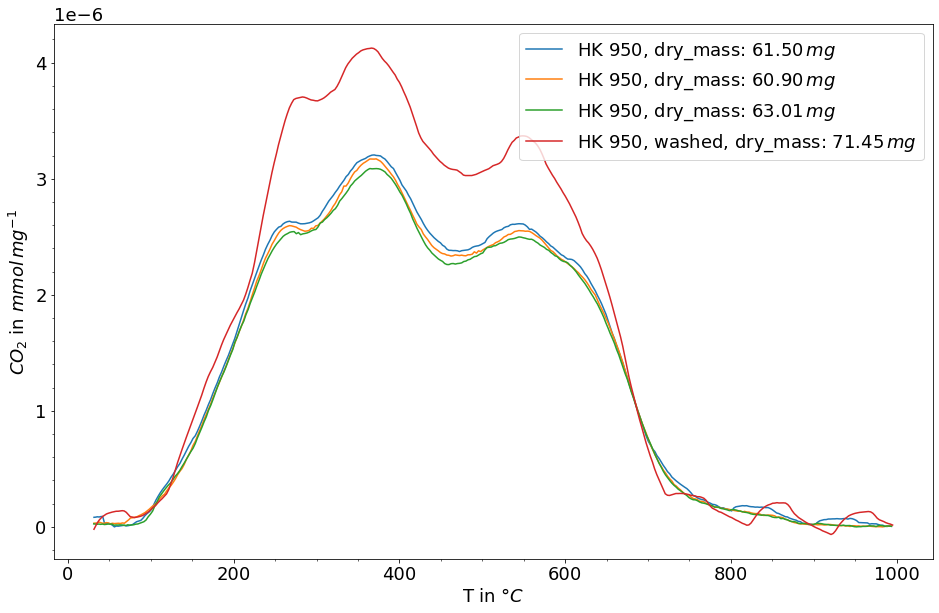

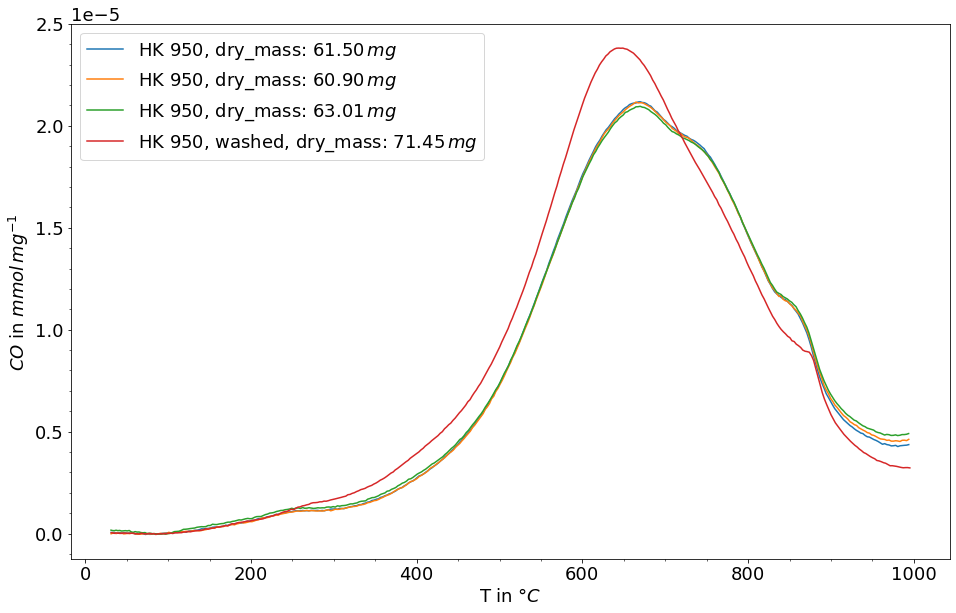

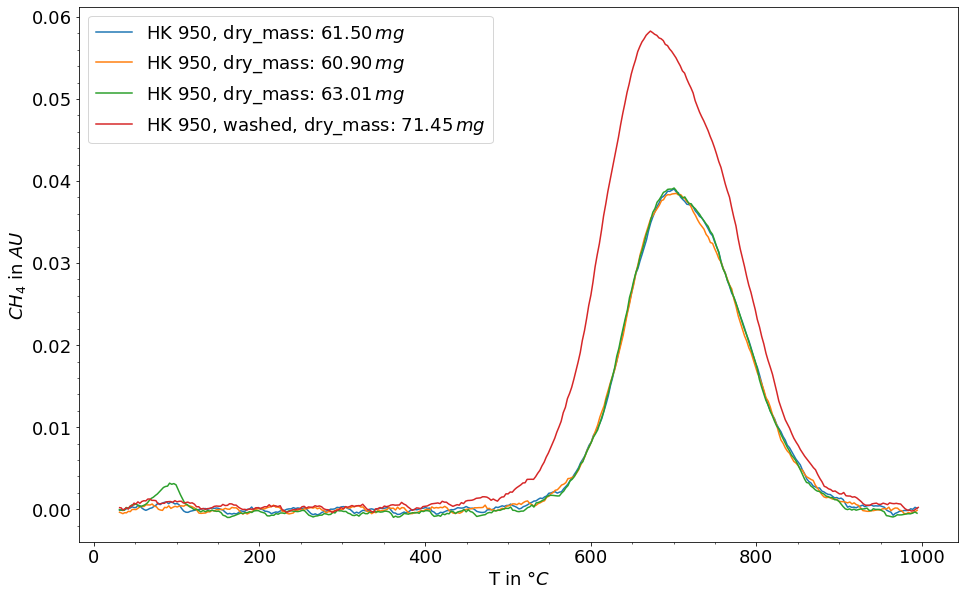

In [11]:
# plot selected gas release rates as overlay by all samples in objs_subset
tir.plots(objs_subset, plot='IR', y_axis='rel', gas='H2O')
tir.plots(objs_subset, plot='IR', y_axis='rel', gas='CO2')
tir.plots(objs_subset, plot='IR', y_axis='rel', gas='CO')
tir.plots(objs_subset, plot='IR', y_axis='orig', gas='CH4')

### Reconstruction of the mass loss rate (DTG) profile

Calibrated gases are quantified (solely by slope of the calibration, see TG_IR.stats) and stacked on each other to be compared with the DTG profile.

Proceeding with CO2 and H2O and CO.


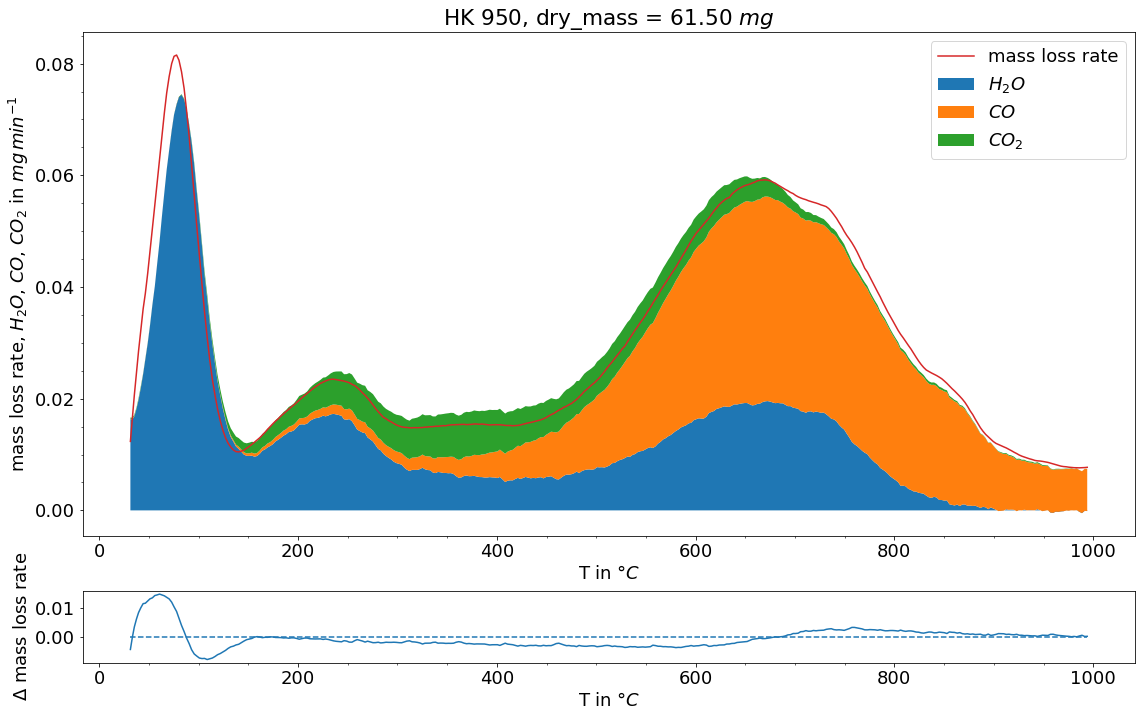

Proceeding with CO2 and H2O and CO.


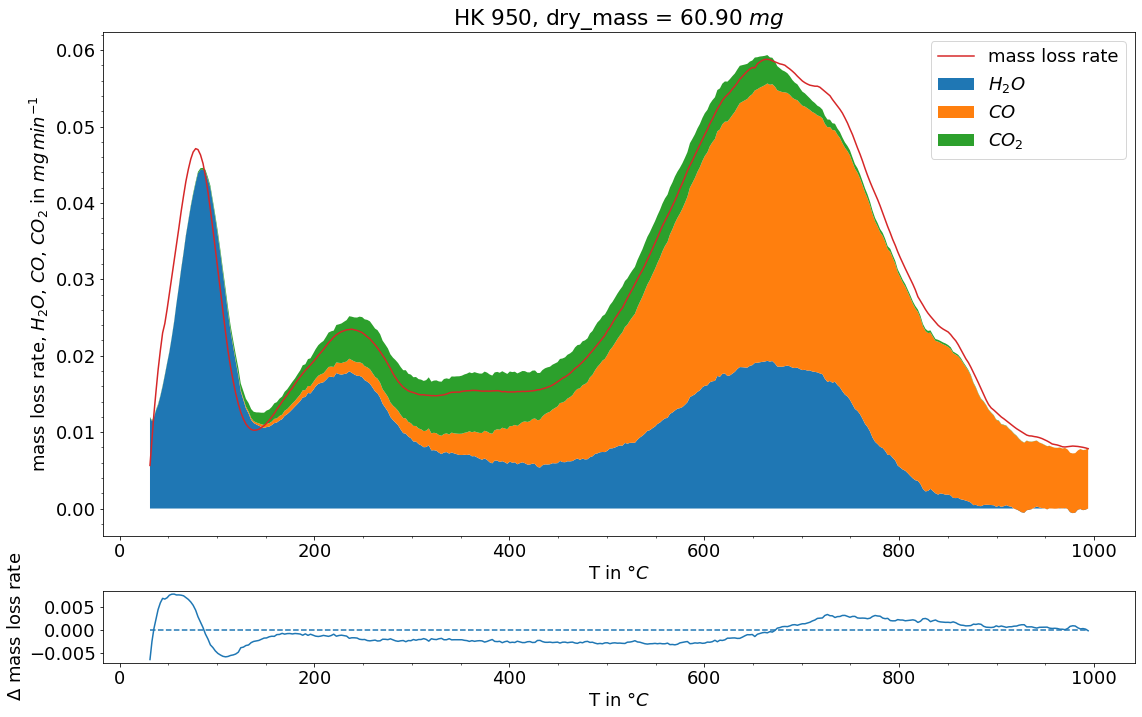

Proceeding with CO2 and H2O and CO.


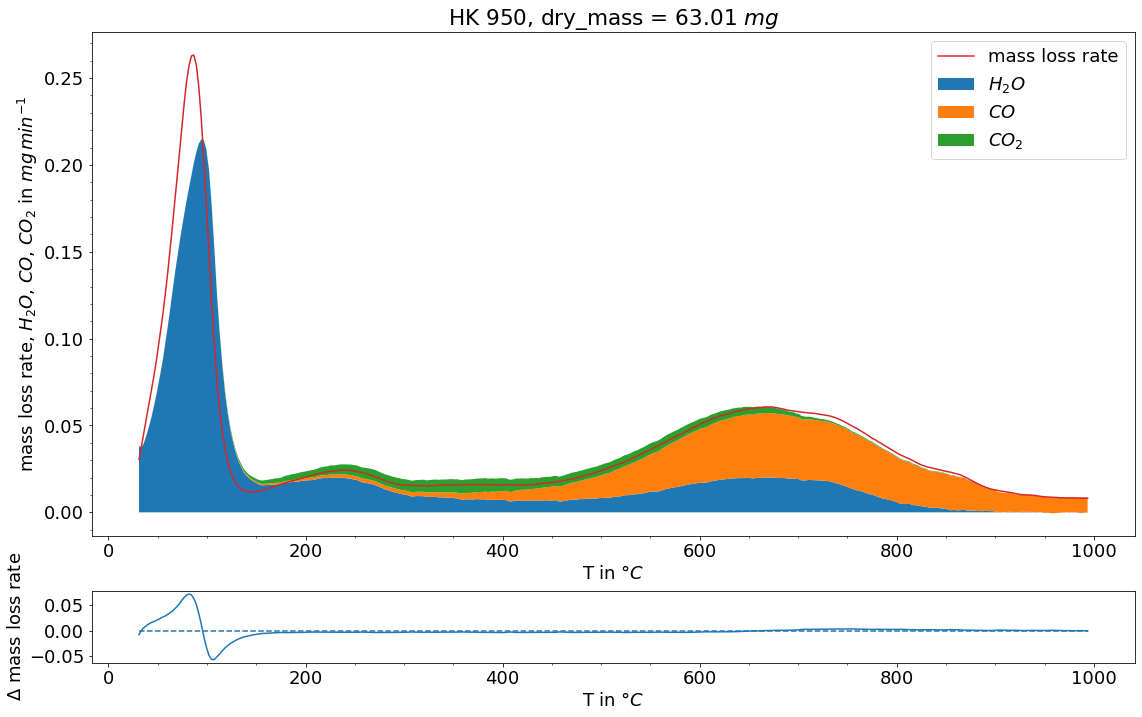

Proceeding with CO2 and H2O and CO.


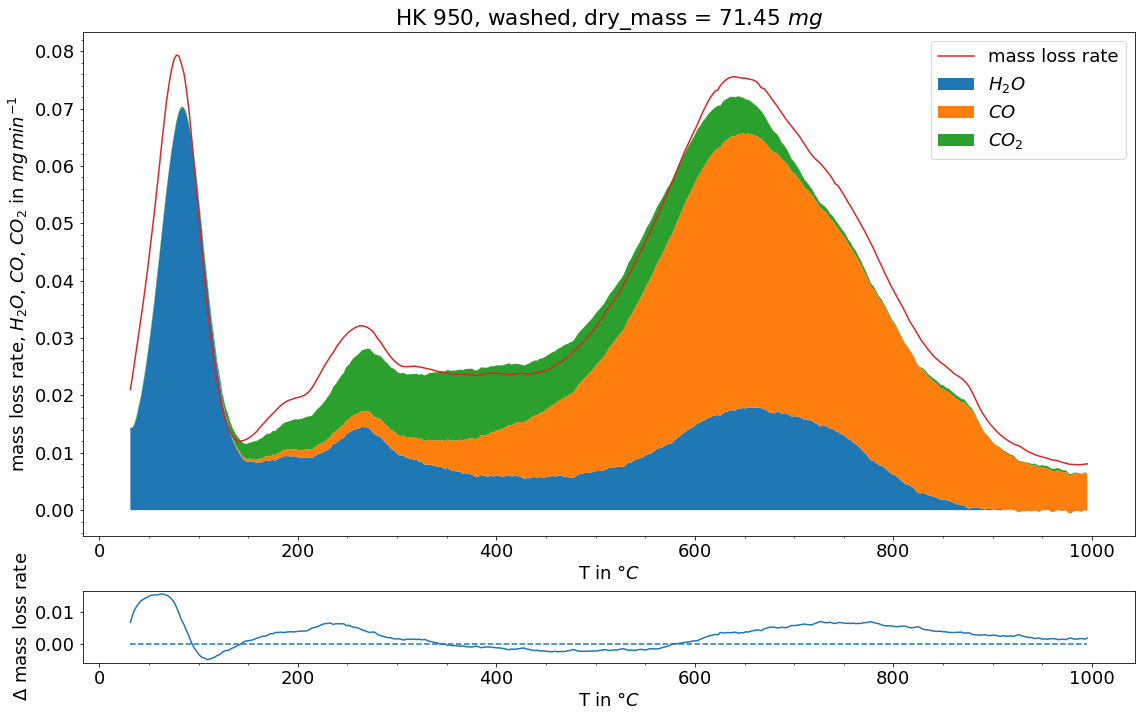

In [12]:
for obj in objs_subset:
    obj.plot('IR_to_DTG', gases = ['H2O','CO','CO2'])

### Deconvolution of the release rates for the determination of surface oxygen groups (SOG)

First, deconvolution and visualization is performed by tir.fits().

Method tir.fits() performs TG_IR.fit() for each passed measurment and calculates a summary result.

Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...


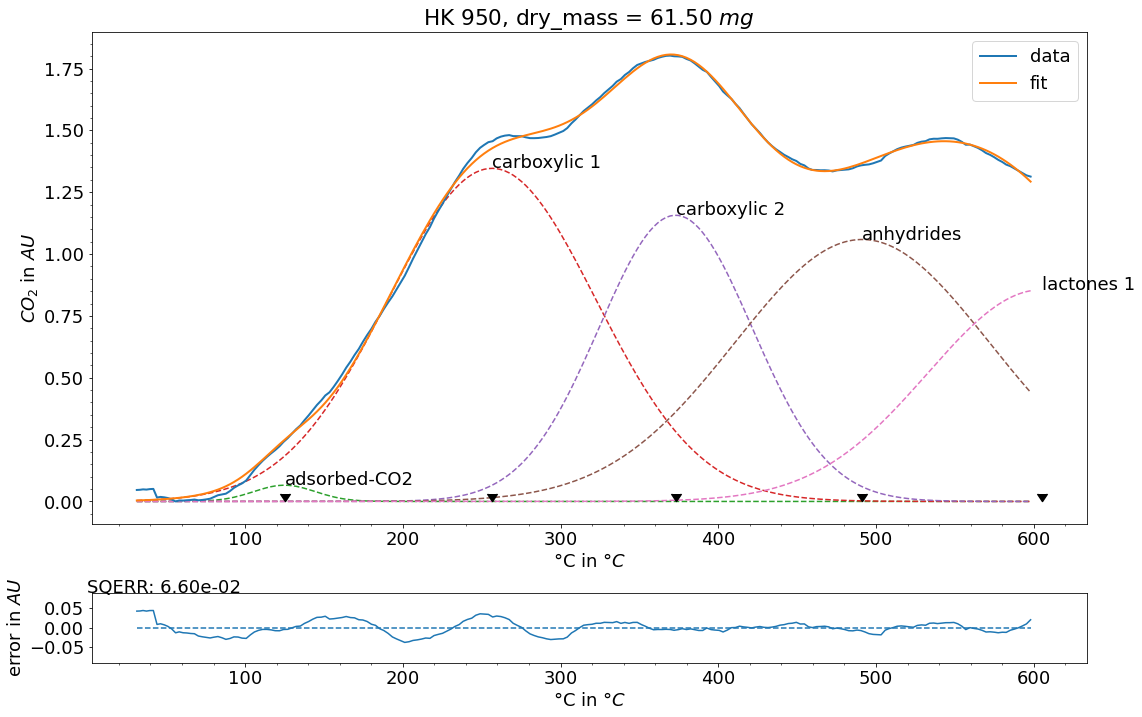

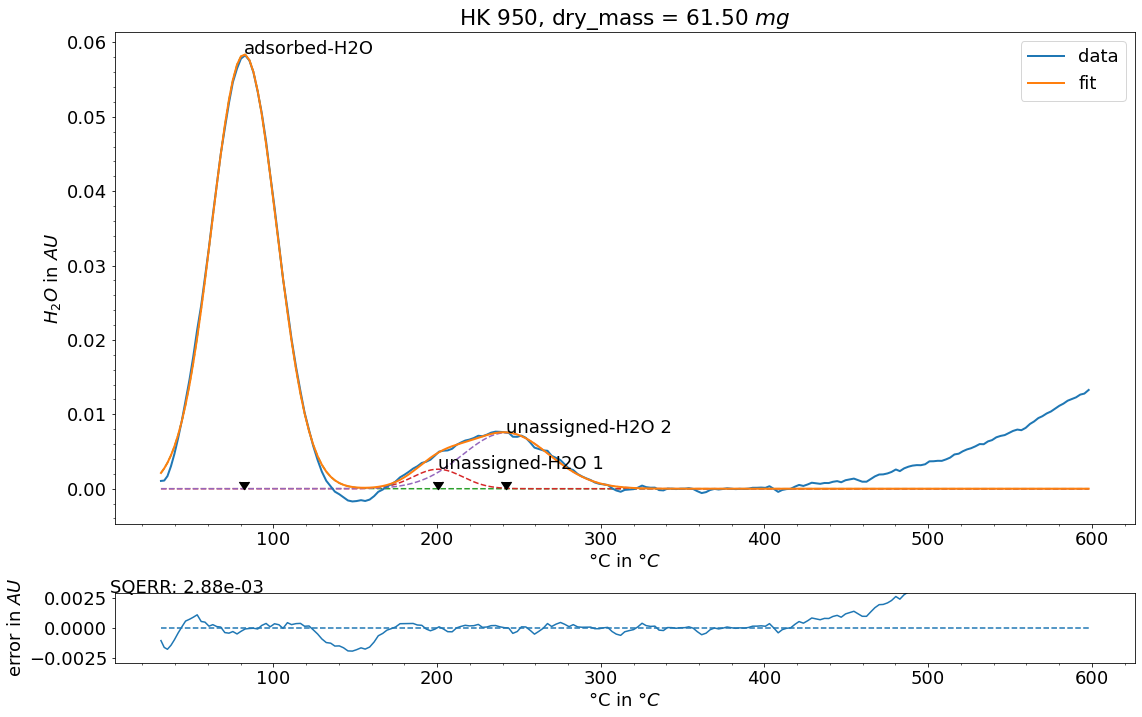

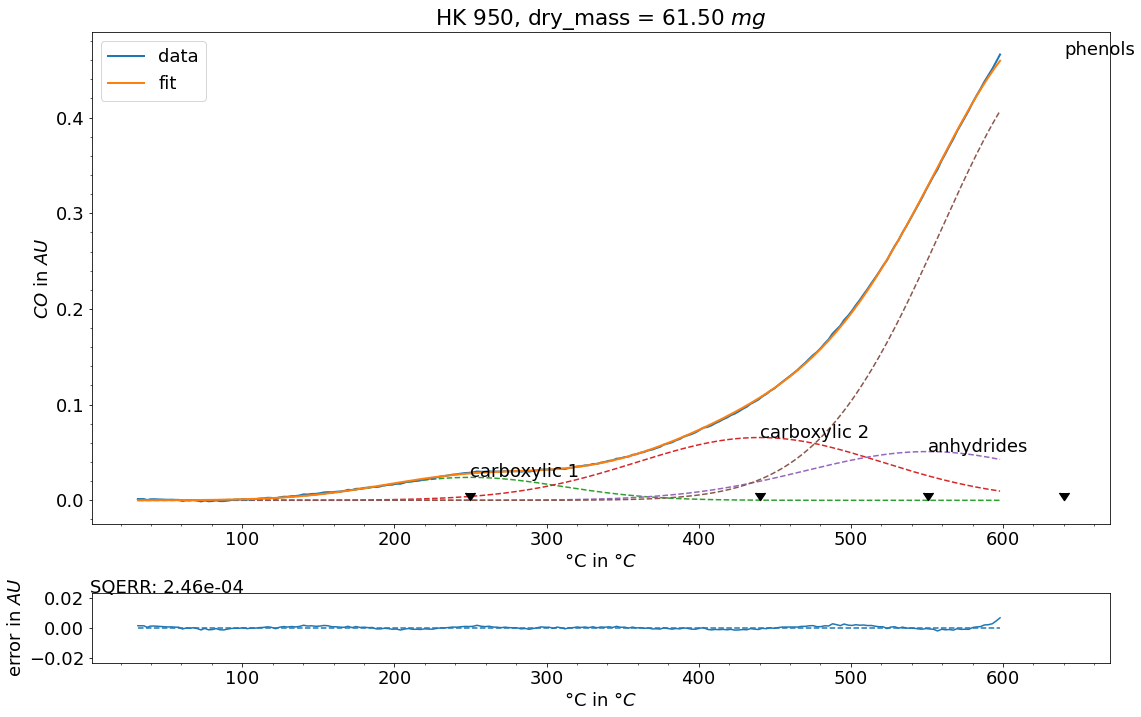

Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...


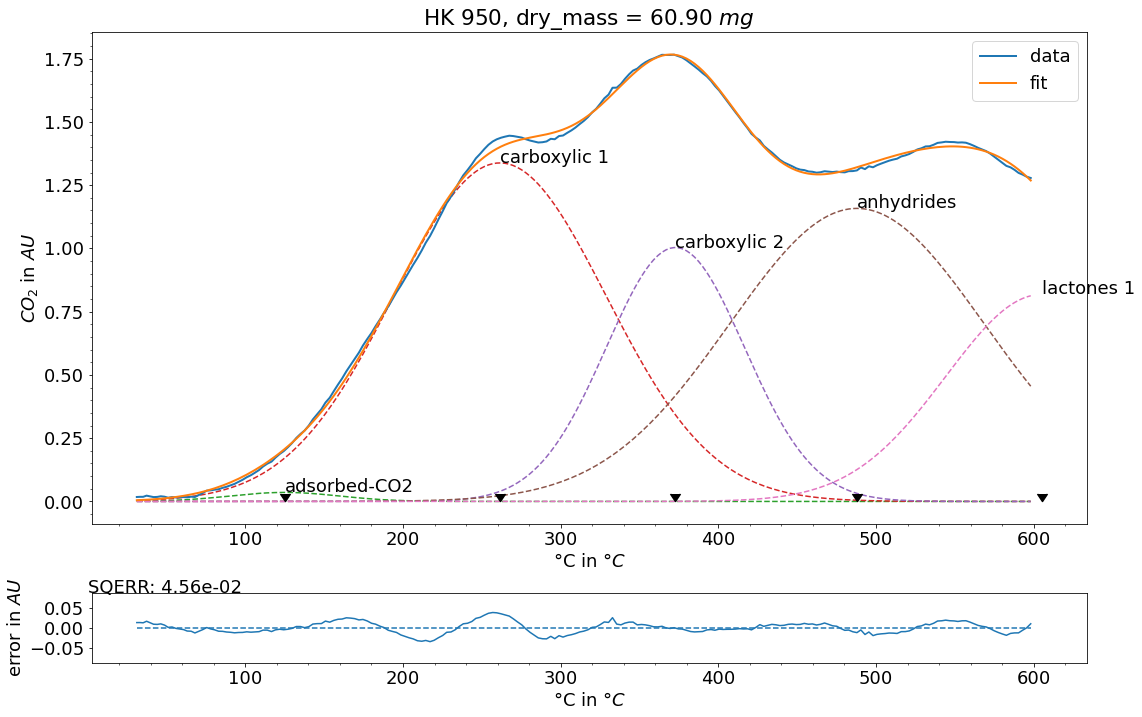

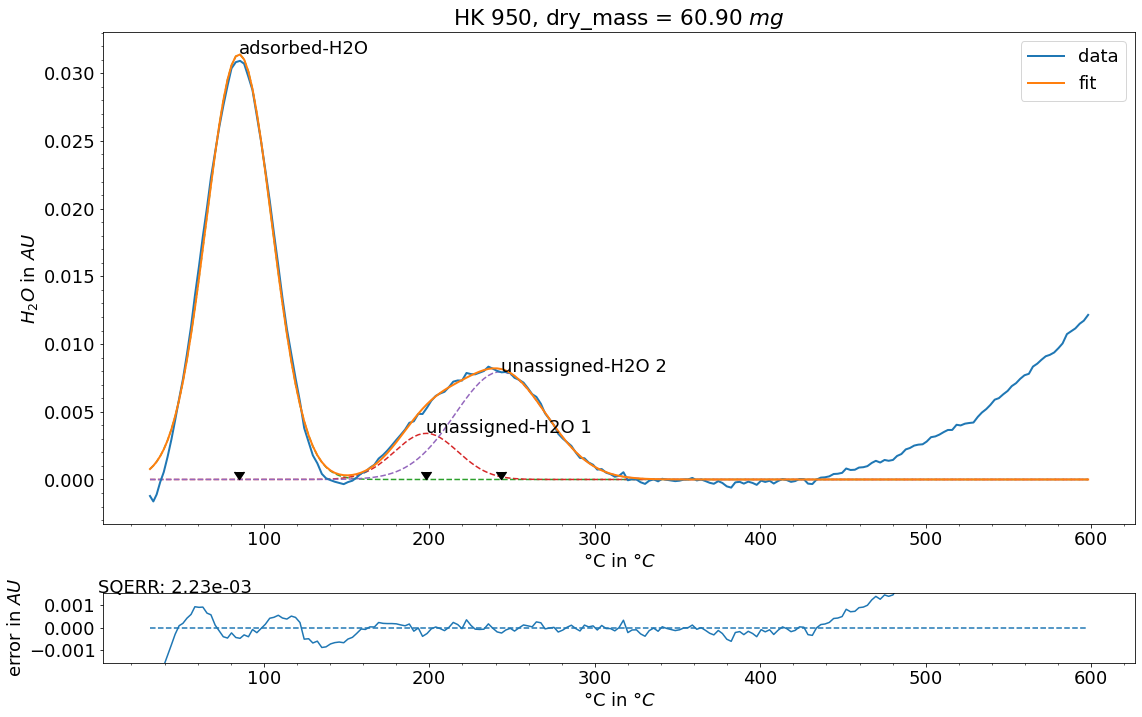

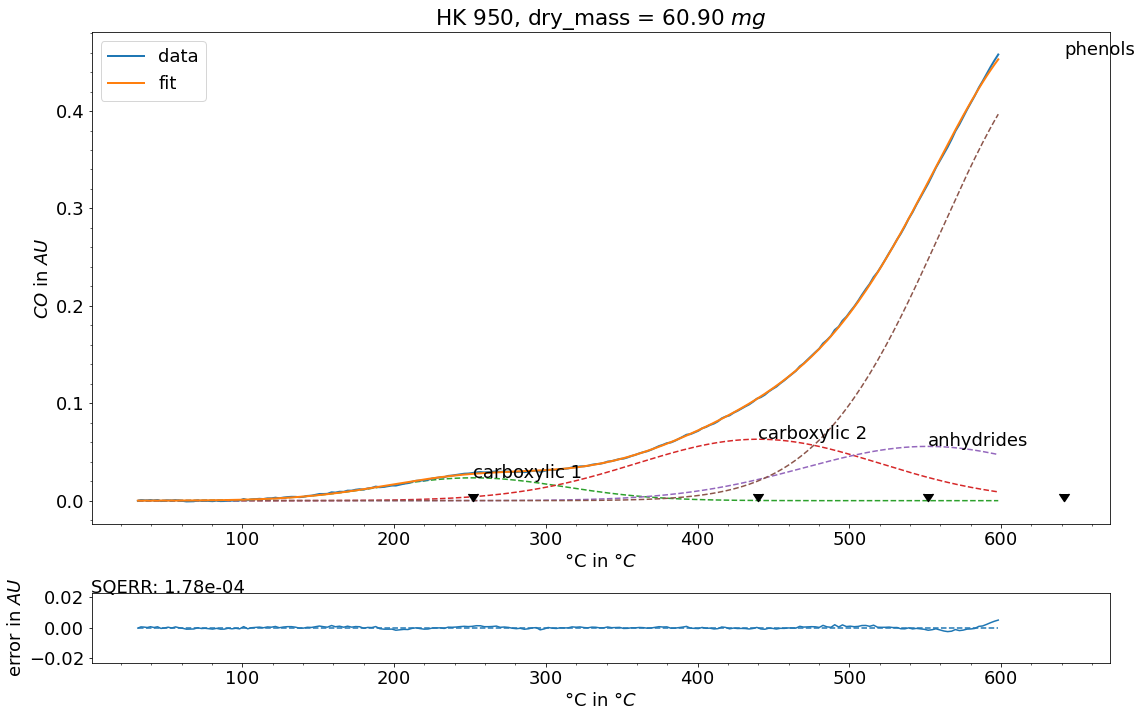

Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...


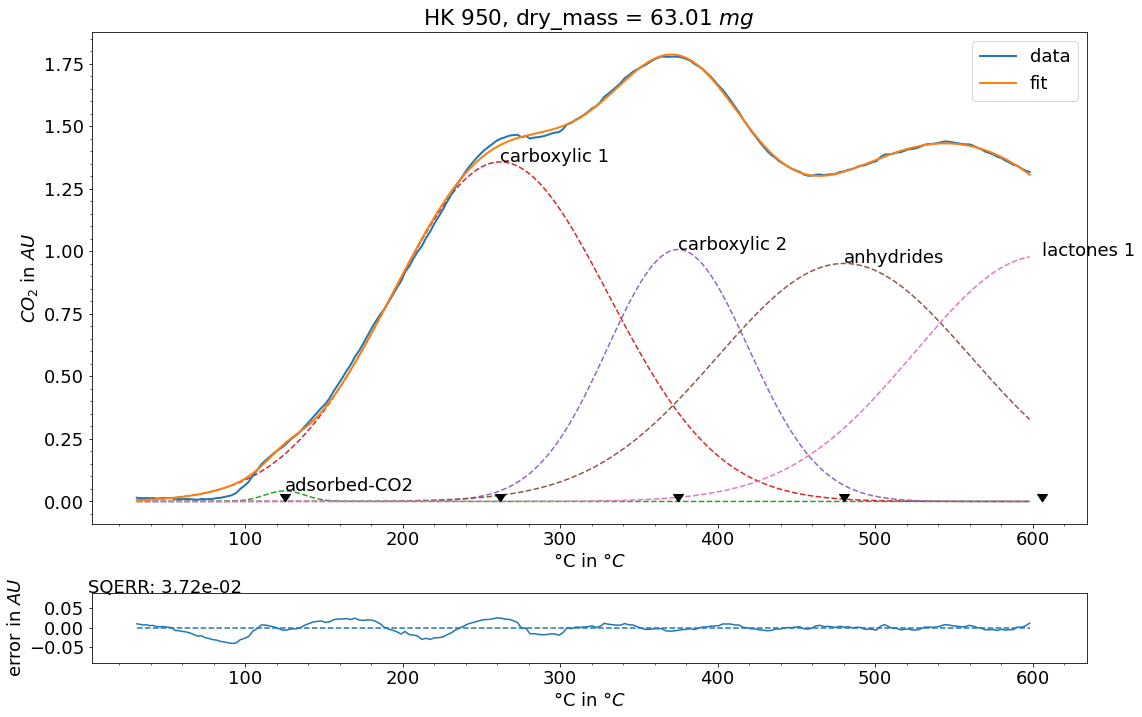

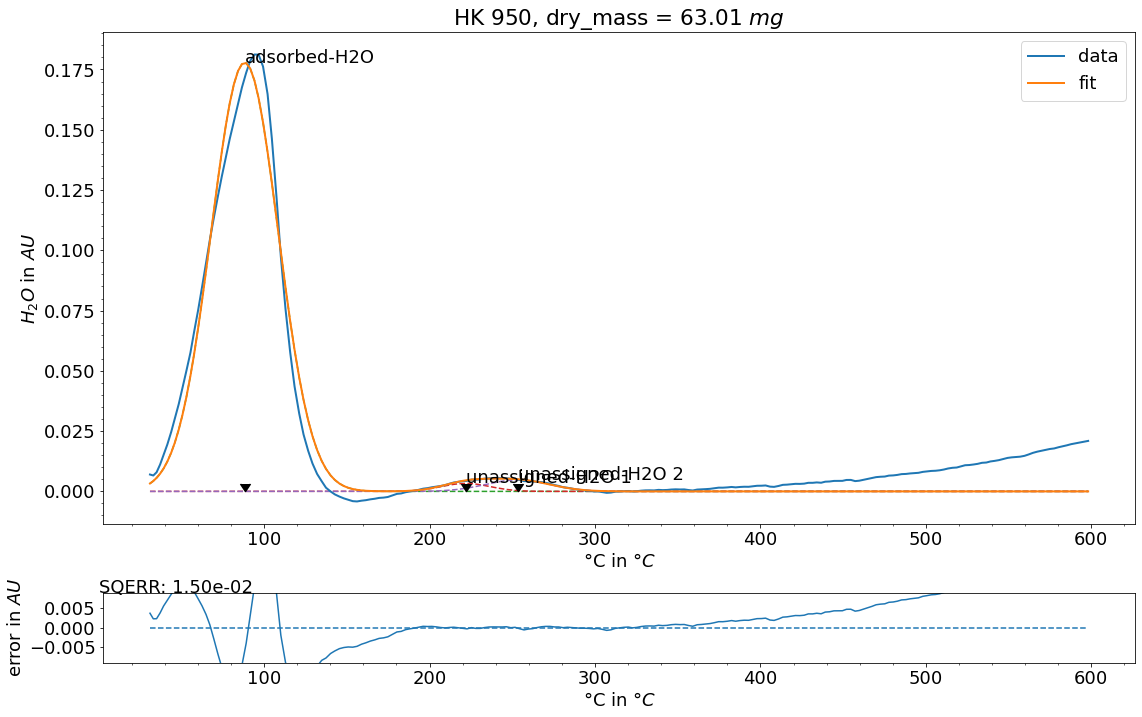

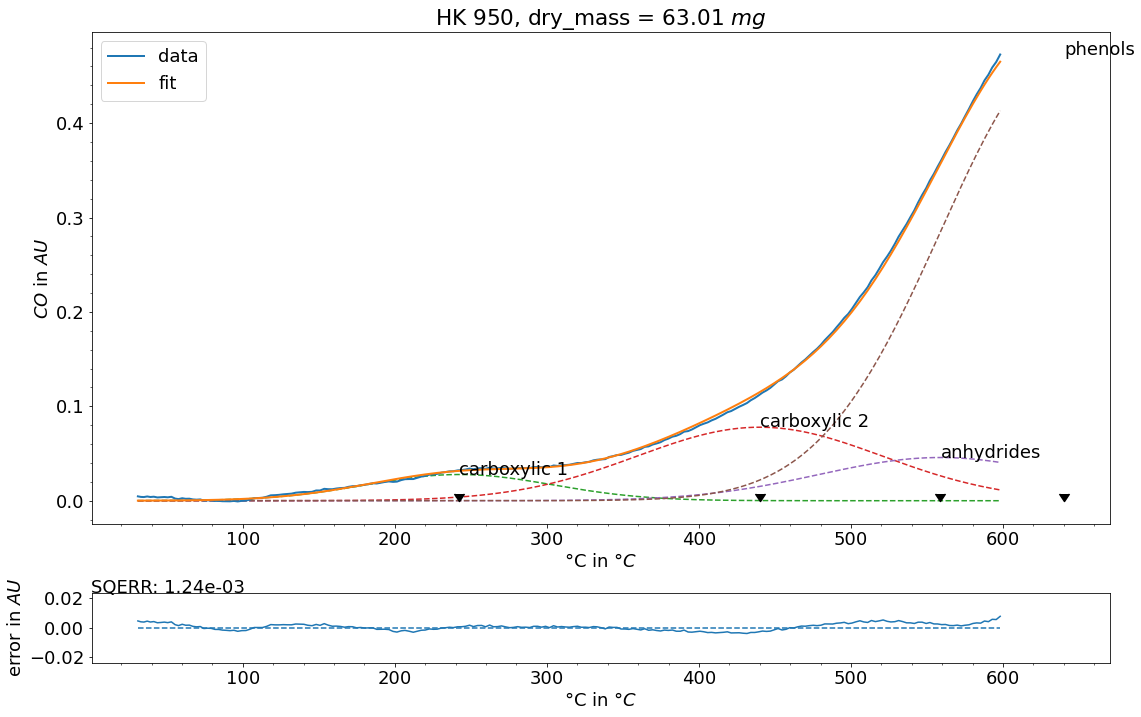

Fitting finished! Plots and results are saved in 'C:/Users/ddittman/Downloads/8PAC_washed/Fitting/2021-03-16_10-21-09_dittmann2021a_ls_6.6_16212_003_ls_6.6_16212_001_ls_6.6_16212_002'.
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...


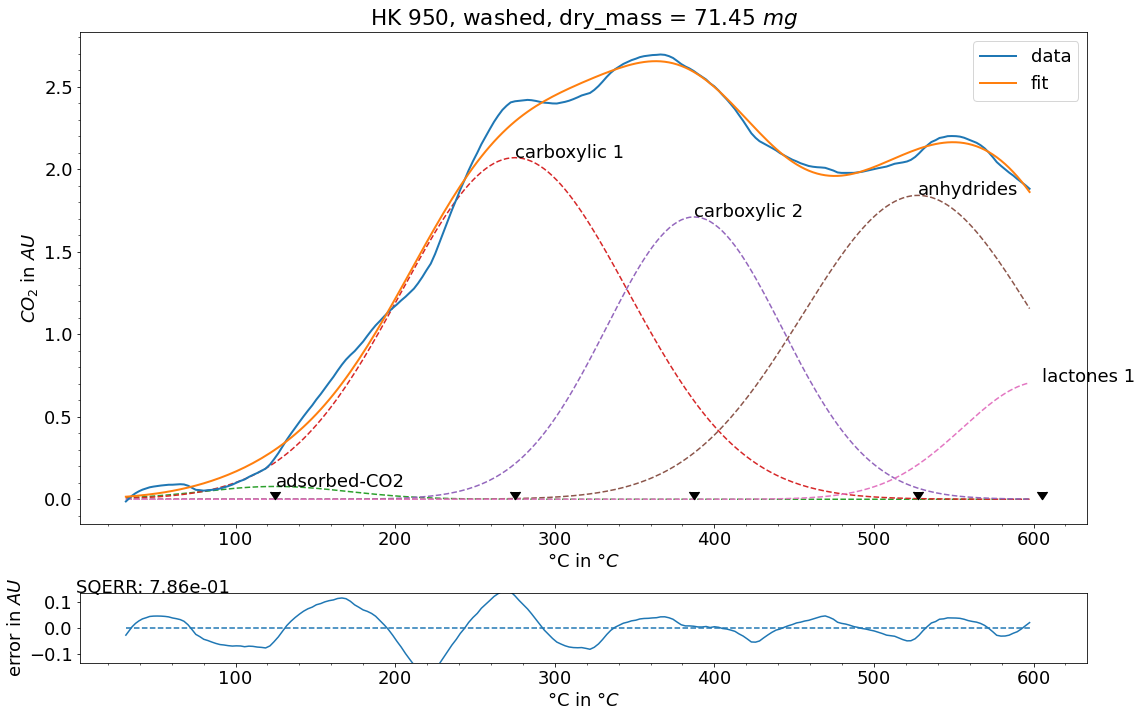

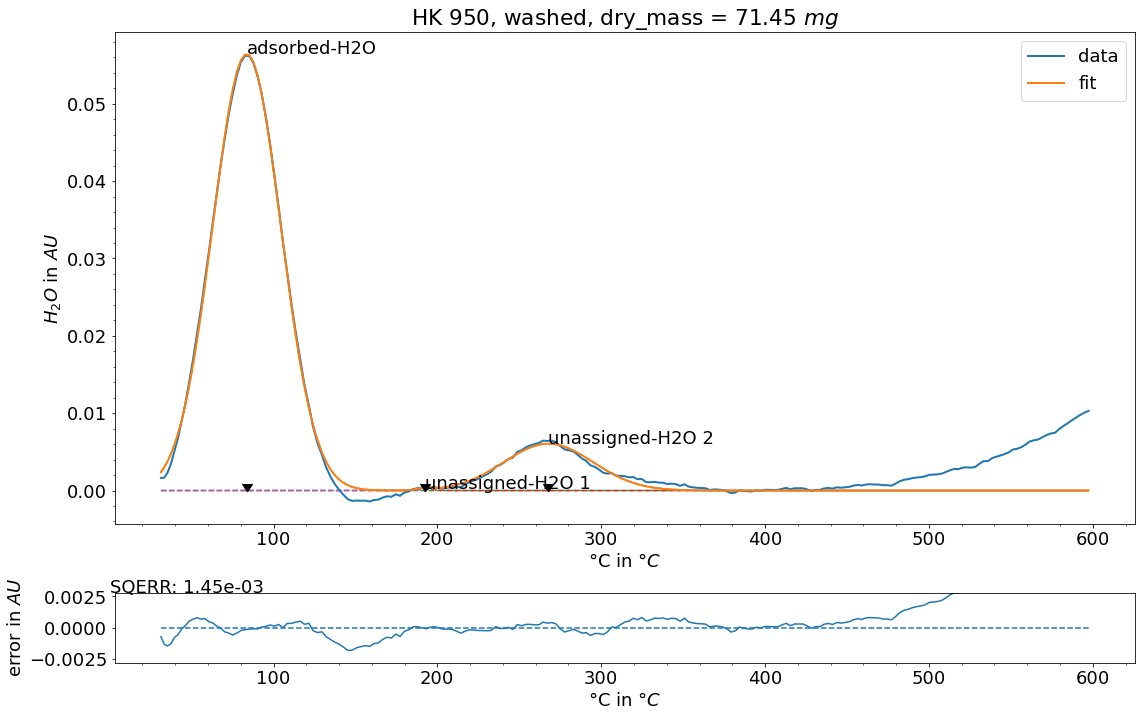

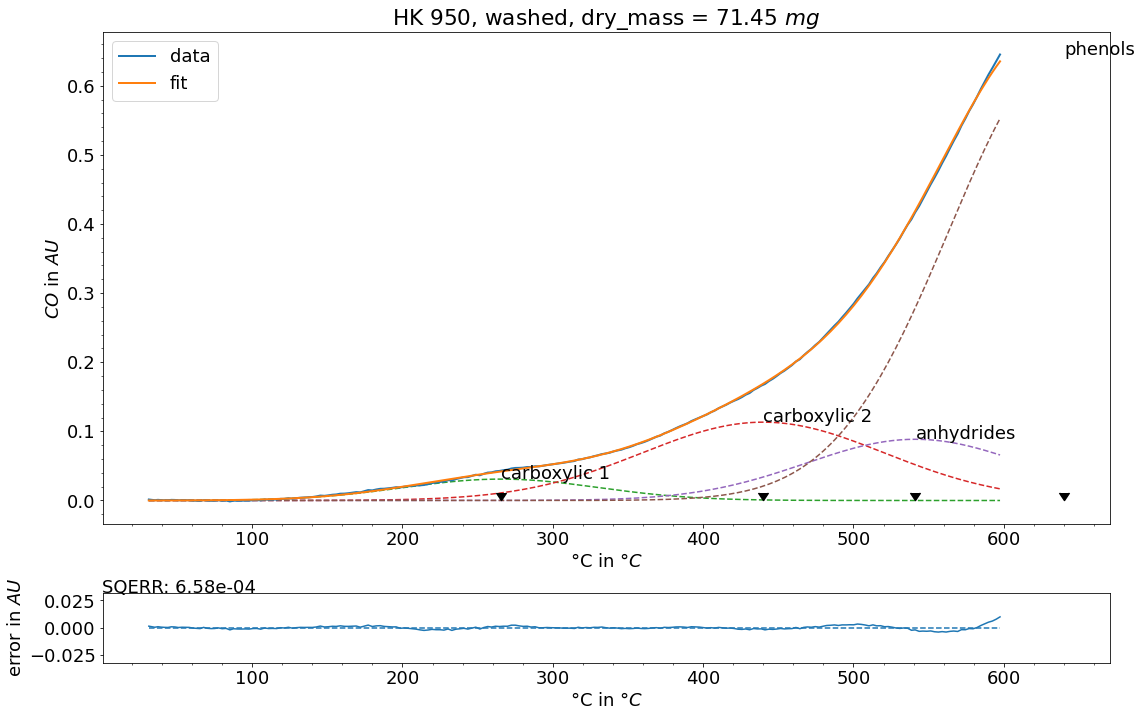

Fitting finished! Plots and results are saved in 'C:/Users/ddittman/Downloads/8PAC_washed/Fitting/2021-03-16_10-21-37_dittmann2021a_milc_17193_684'.


In [13]:
# Fitting can be limited to an upper temperature by T_max = ...
# T_max_tol = ... includes peaks for the fitting with the respective temperature above T_max.
tir.fits(objs_subset, 'dittmann2021b');

Second, robustness of the deconvolution results is tested by tir.robustness().

Method tir.robustness() is using tir.fits() several times by vaying the fitting parameter.
Therefore, the obtained results are tested for robustness according method and deconvolution assumptions.

The function returns the path to the saved results, that can be used for further data evaluation.

Initial results:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Varying fitting parameters...
Approximate remaining time: 8.2 min
__________________________________________________________________________________________
__________________________________________________________________________________________
center_0 -10:

Carboxylic 1 CO:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Carboxylic 2 CO:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to

Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
__________________________________________________________________________________________
__________________________________________________________________________________________
hwhm_max +10:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
__________________________________________________________________________________________
__________________________________________________________________________________________
height_0 -0.3:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...
Fitting according to 'ditt

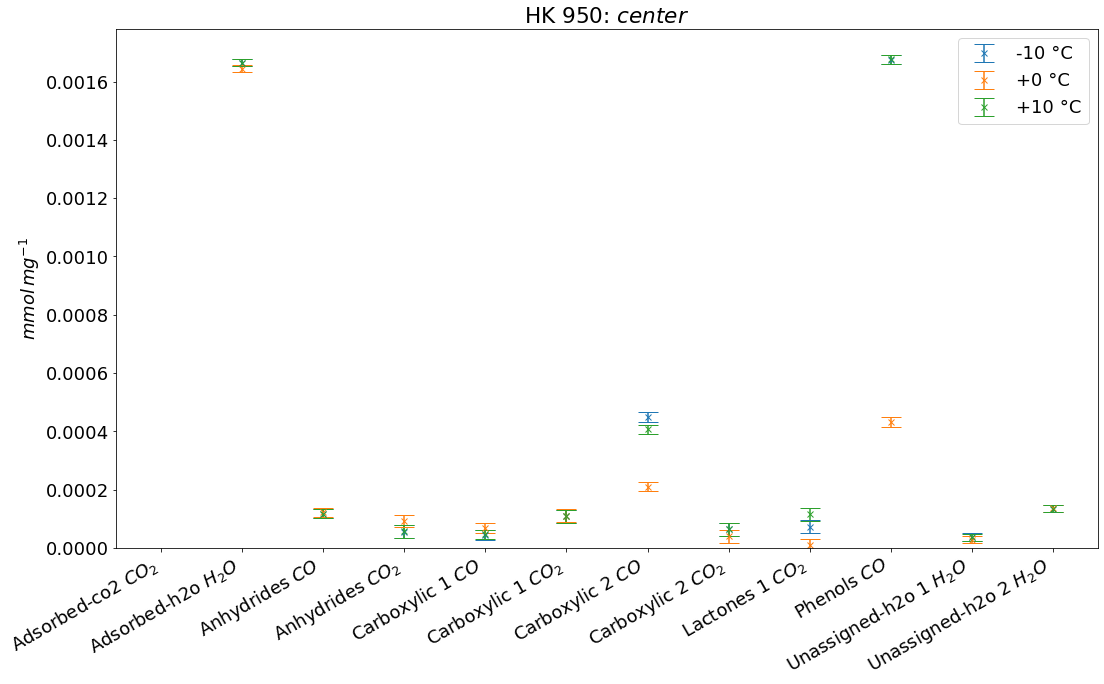

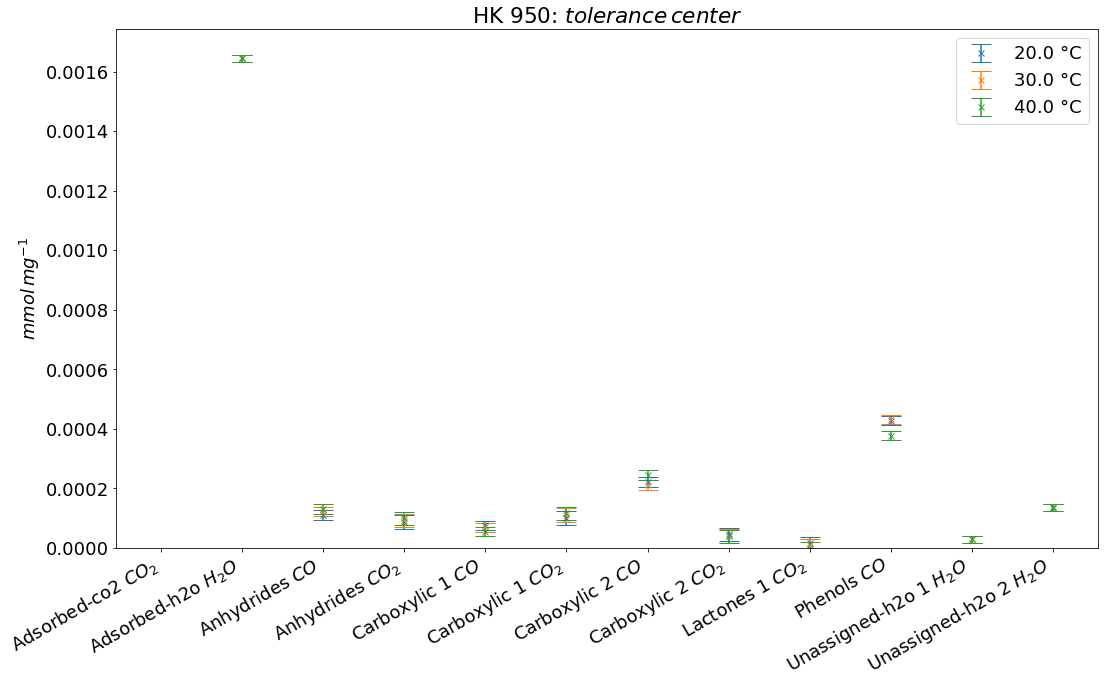

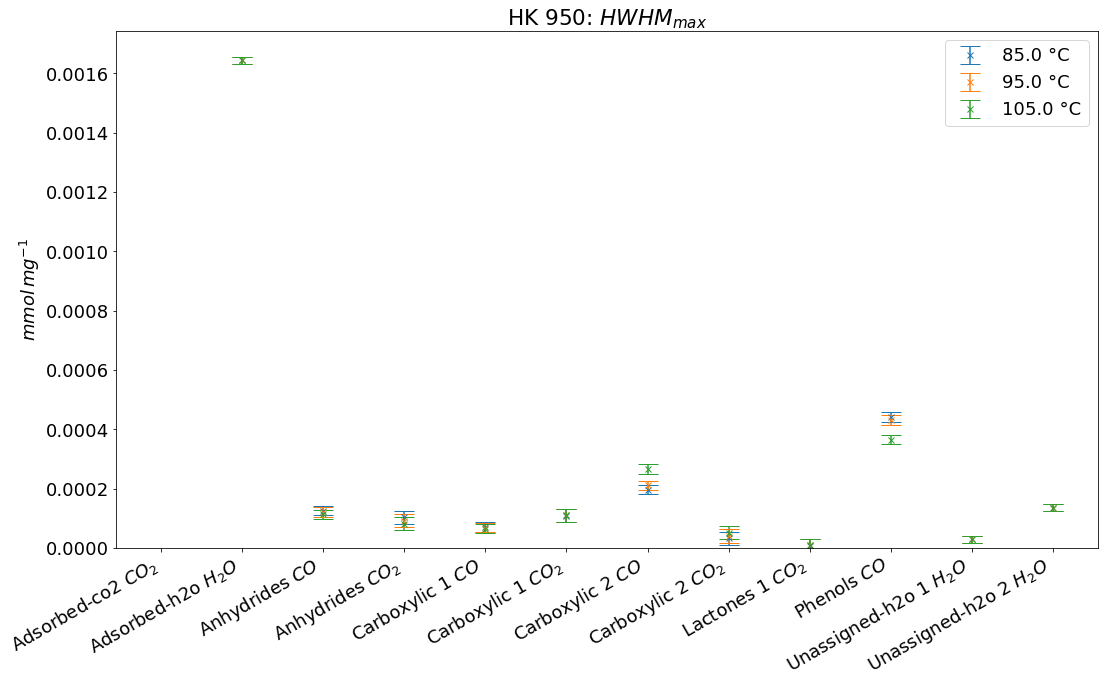

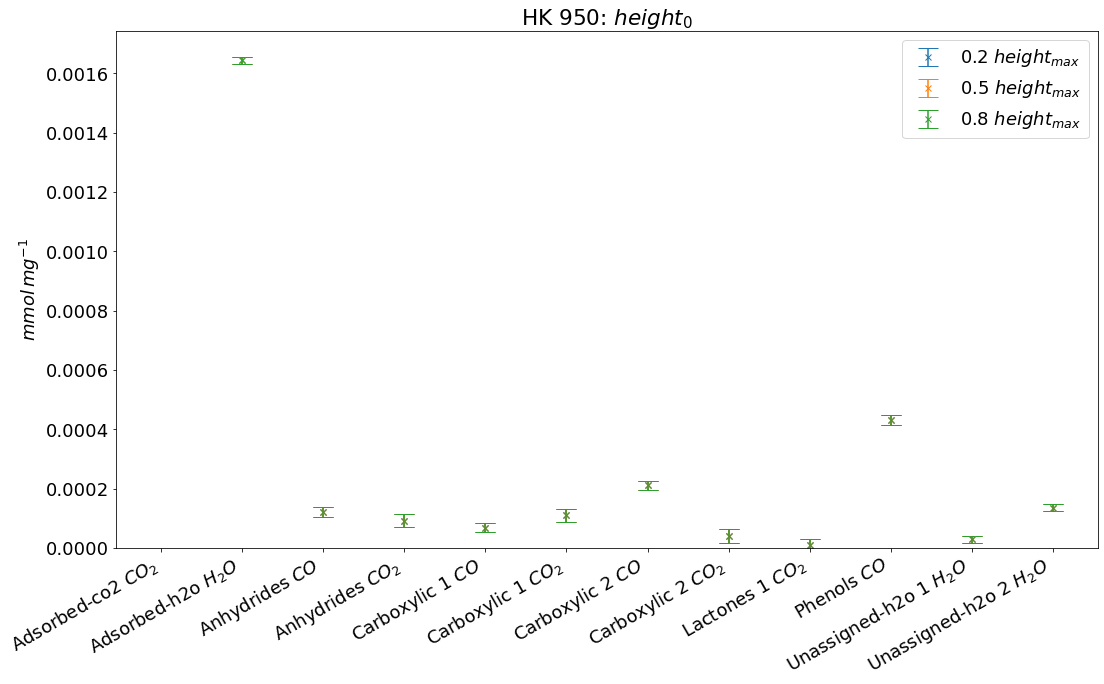

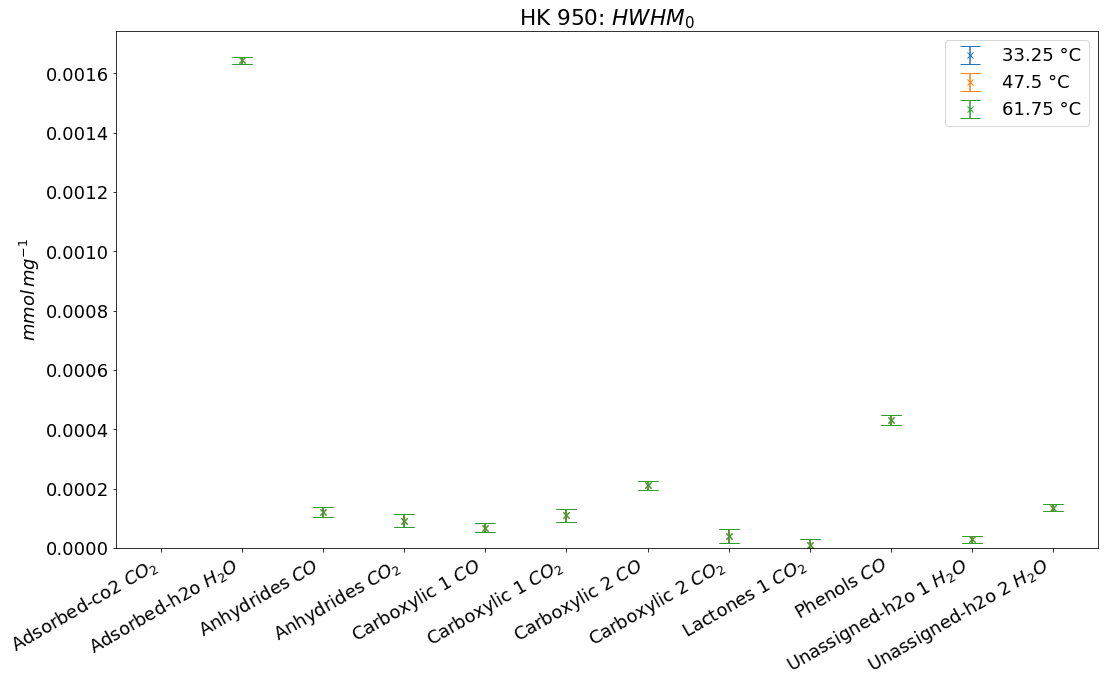

Fittings finished! Plots and results are saved in 'C:/Users/ddittman/Desktop/Paper - Aktivkohlecharakterisierung/06_TGA-FTIR/TGA-FTIR-hyphenation-tool-kit-master_8PAC_washed/Robustness\2021-03-20_13-41-28_dittmann2021a_10_0.3'.
Initial results:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Varying fitting parameters...
Approximate remaining time: 2.8 min
__________________________________________________________________________________________
__________________________________________________________________________________________
center_0 -10:

Carboxylic 1 CO:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Carboxylic 2 CO:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Anhydrides CO:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Phenols CO:
Fitting according to 'dittmann2021a' in Fitting_parameters.xlsx is in progress ...

Adsorbed-co

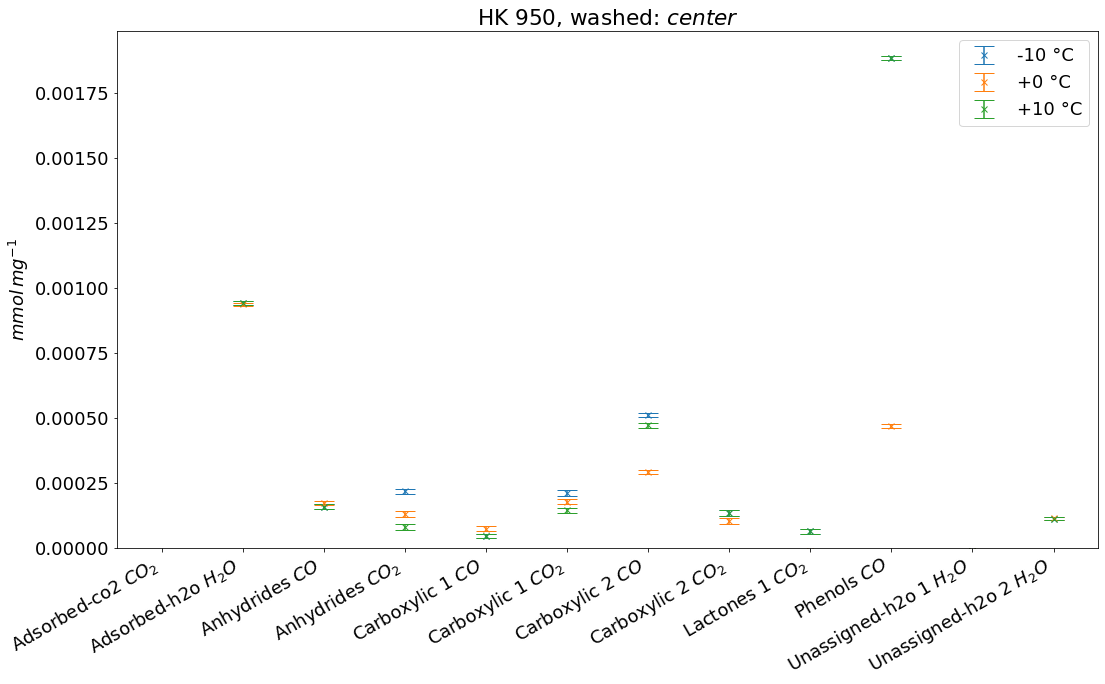

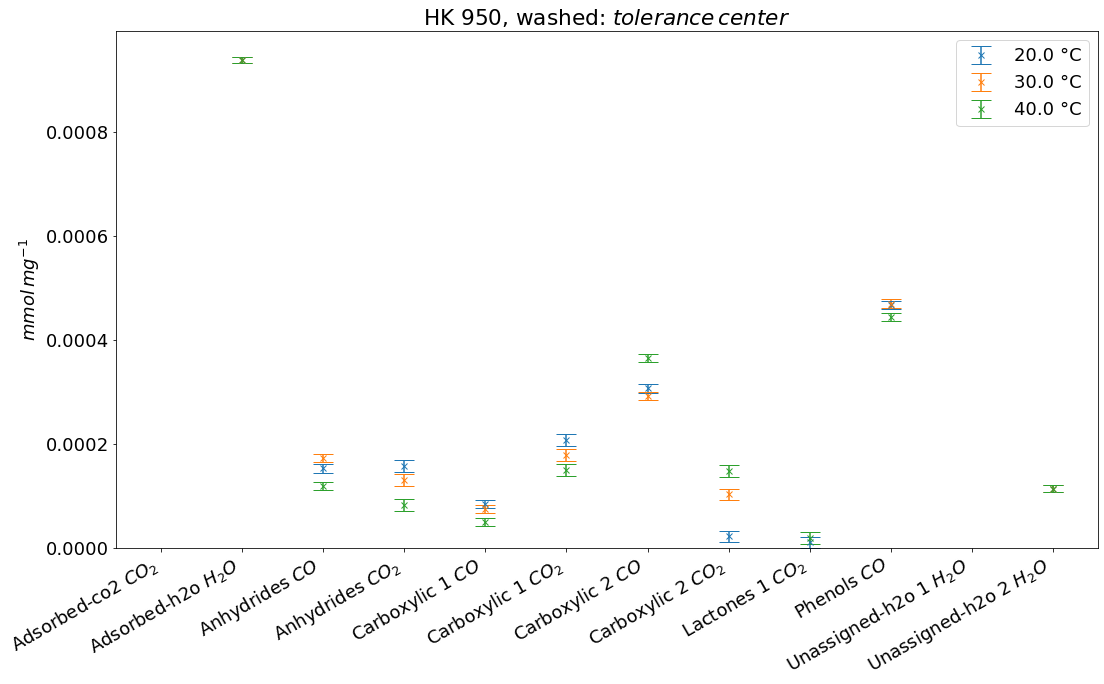

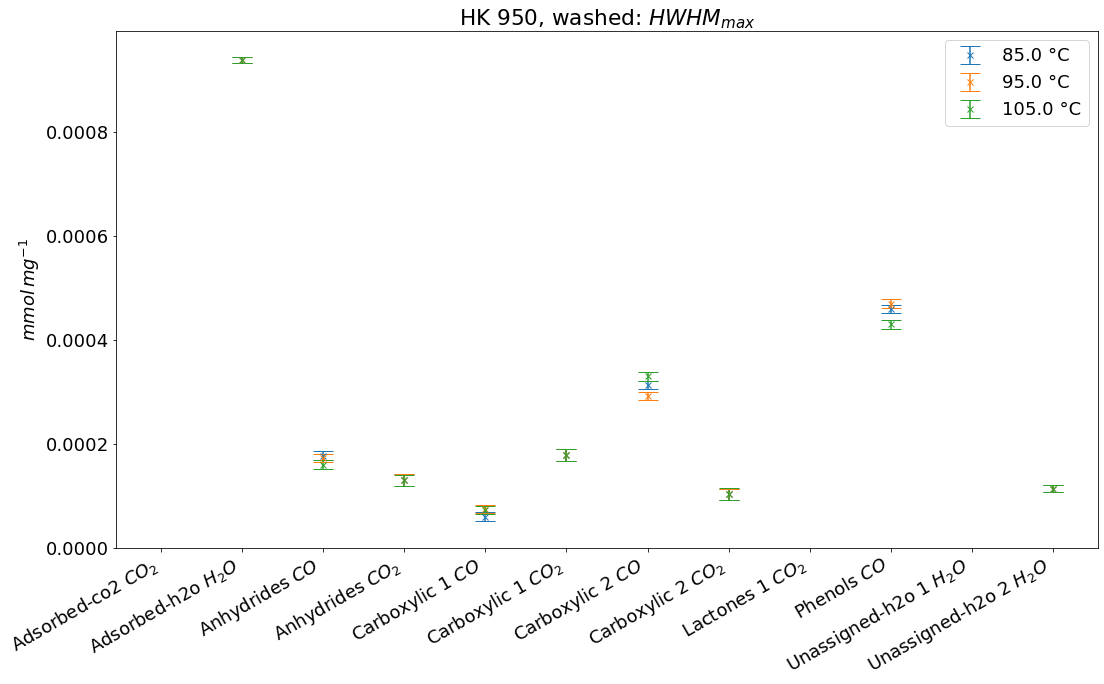

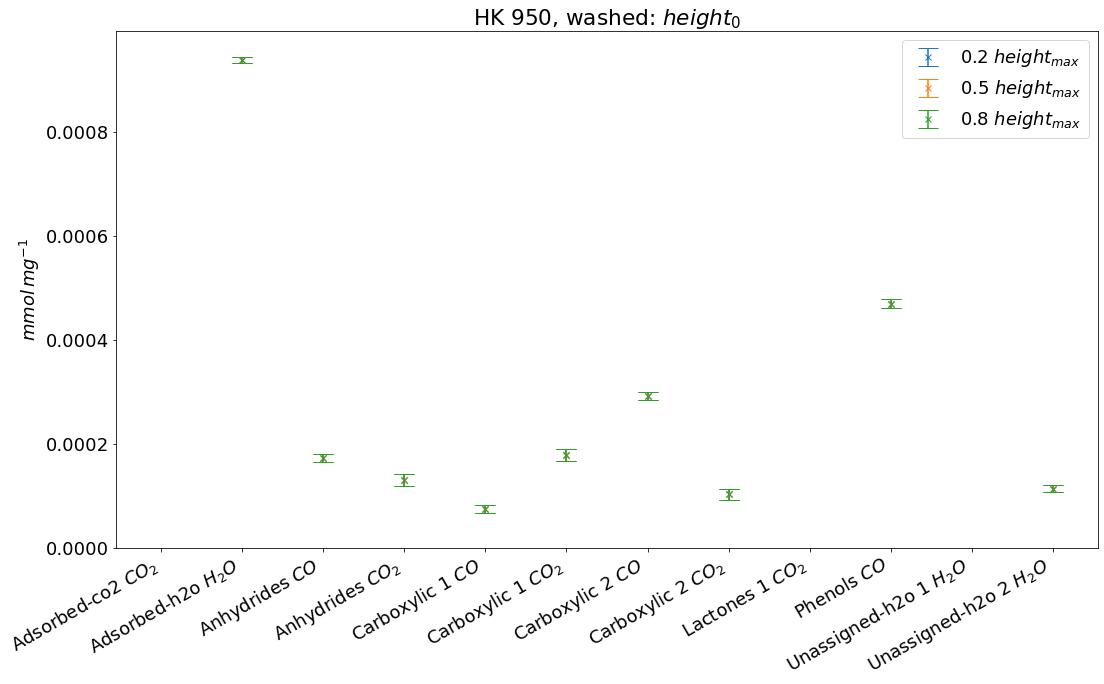

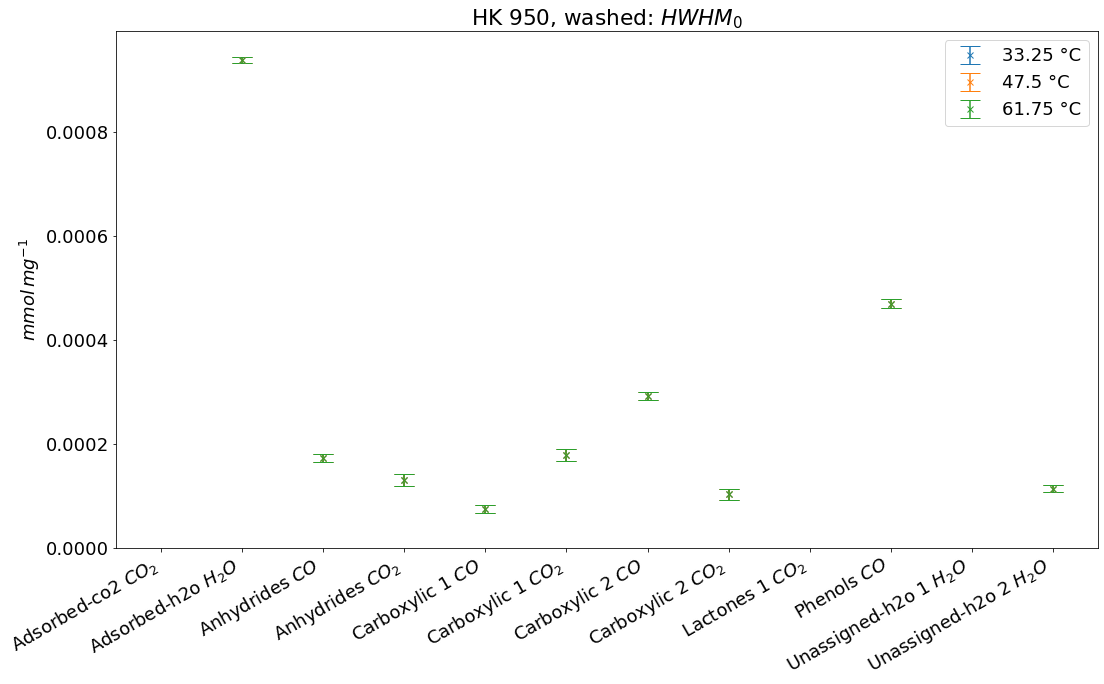

Fittings finished! Plots and results are saved in 'C:/Users/ddittman/Desktop/Paper - Aktivkohlecharakterisierung/06_TGA-FTIR/TGA-FTIR-hyphenation-tool-kit-master_8PAC_washed/Robustness\2021-03-20_13-44-17_dittmann2021a_10_0.3'.


In [11]:
# results were saved and respective paths are stored in variables
# T_max and T_max_tol are availabe in tir.robustness() as well.
path = tir.robustness(objs_subset, reference='dittmann2021b')
path_robustness = path
SOG_results['subset1_path'] = path

### Evaluation of the SOG results

Load results of the robustness testing from paths by tir.summarize().

In [10]:
results_summarized = tir.summarize(path_robustness, select_groups = ['carboxylic',
                                                                     'anhydrides',
                                                                     'lactones',
                                                                     'phenols',
                                                                     'carbonyls',
                                                                     'pyrones'])

In [12]:
# Polish labeling and allow to concatenate several dataframes for joint plotting
summarized = tir.concatenate([results_summarized])
summarized

samples          HK 950                   HK 950, washed                   
            mmol_per_mg      stddev label    mmol_per_mg       stddev label
carboxylic   0.00047751  8.7439e-05          0.000692896  8.78803e-05      
anhydrides  0.000103518  1.1634e-05          0.000147448  1.99391e-05

Plotting of the summarized results according to columns (by samples) or rows (by groups) in the summarized dataframe.

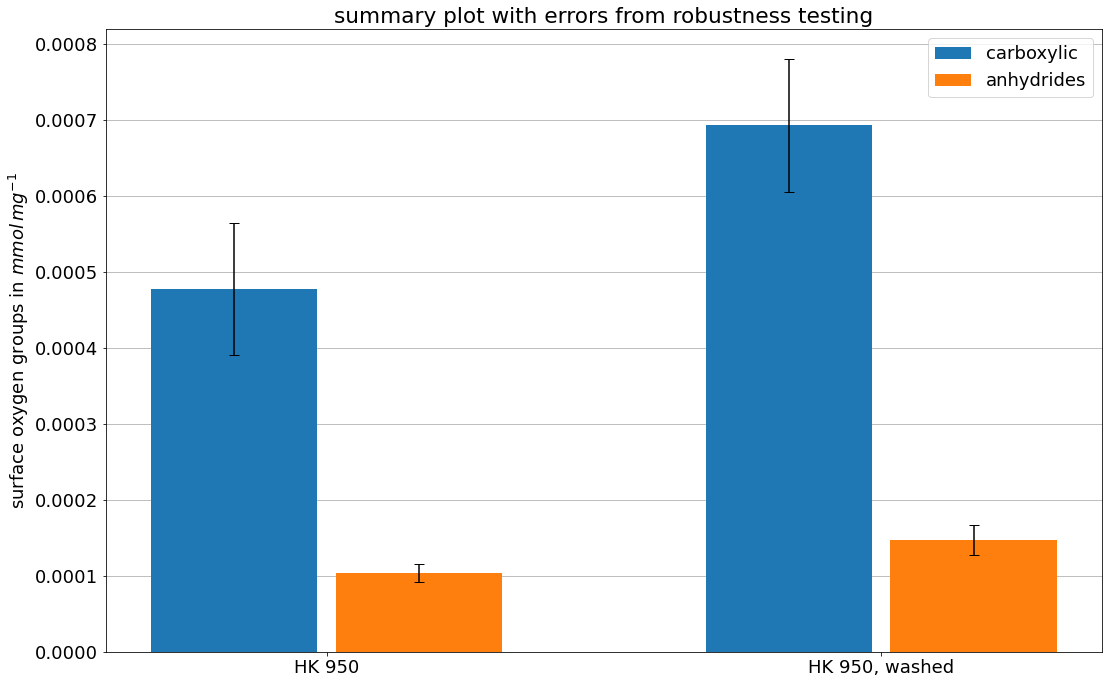

In [13]:
tir.bar_plot_results(summarized, group_by = 'samples', save = True)

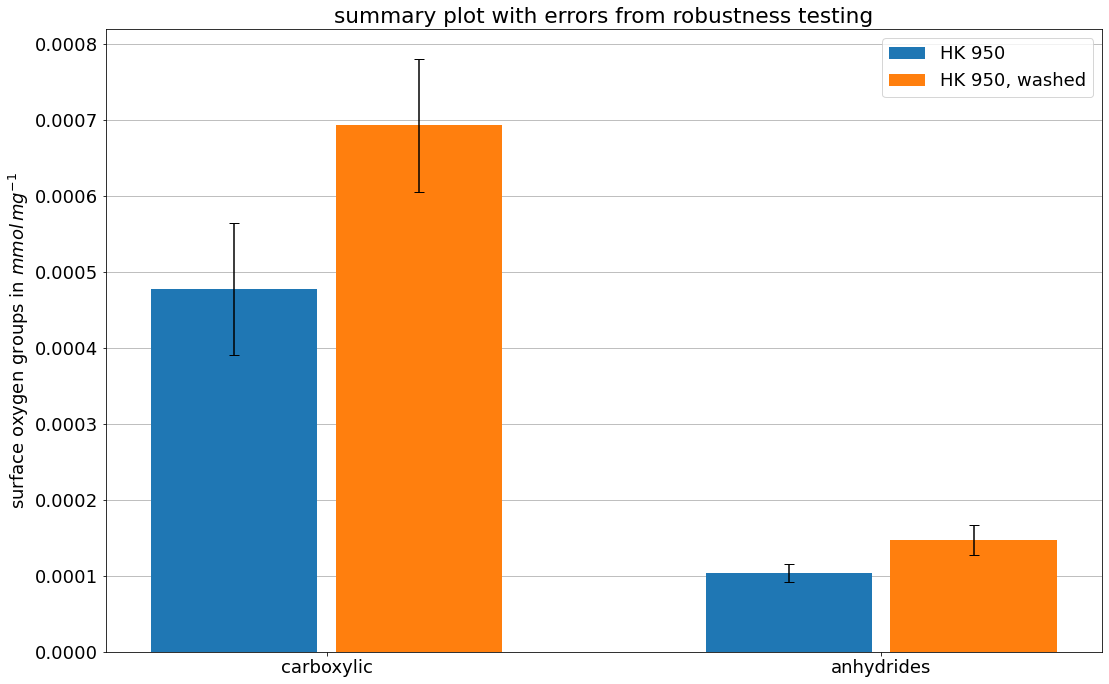

In [14]:
tir.bar_plot_results(summarized, group_by = 'groups', save = True)

Additionally, laod all fitted peaks for a more detailed evaluation and plot them the same way.

In [15]:
results_detailed = tir.summarize(path_robustness, condense_results = False)

In [17]:
detailed = tir.concatenate([results_detailed])
detailed

samples                    HK 950                     HK 950, washed  \
                      mmol_per_mg       stddev  label    mmol_per_mg   
adsorbed-CO2_CO2     -4.06395e-05  1.01553e-06  < LOD   -3.15685e-05   
adsorbed-H2O_H2O       0.00164791    0.0012011           0.000938477   
anhydrides_CO         0.000120826  1.32959e-05           0.000163173   
anhydrides_CO2        8.62102e-05  1.90951e-05           0.000131723   
carboxylic 1_CO       6.41278e-05  1.07403e-05           6.68548e-05   
carboxylic 1_CO2       0.00010974  4.71898e-06           0.000178471   
carboxylic 2_CO       0.000258135  8.52061e-05            0.00034175   
carboxylic 2_CO2      4.55078e-05  1.57439e-05           0.000105821   
lactones 1_CO2        2.38958e-05  3.62934e-05  < LOQ    6.04847e-06   
phenols_CO            0.000647653  0.000492779           0.000719424   
unassigned-H2O 1_H2O   3.0611e-05  1.06794e-05          -1.33282e-05   
unassigned-H2O 2_H2O  0.000135929   5.4514e-05           0.000113653   

samples                                   
                           stddev  label  
adsorbed-CO2_CO2      1.05074e-06  < LOD  
adsorbed-H2O_H2O      1.82835e-06         
anhydrides_CO          1.6537e-05         
anhydrides_CO2        3.62877e-05         
carboxylic 1_CO       1.34147e-05         
carboxylic 1_CO2      1.97712e-05         
carboxylic 2_CO       7.80085e-05         
carboxylic 2_CO2      3.26614e-05         
lactones 1_CO2        3.06541e-05  < LOD  
phenols_CO            0.000575687         
unassigned-H2O 1_H2O   1.3583e-07  < LOD  
unassigned-H2O 2_H2O   6.5386e-07

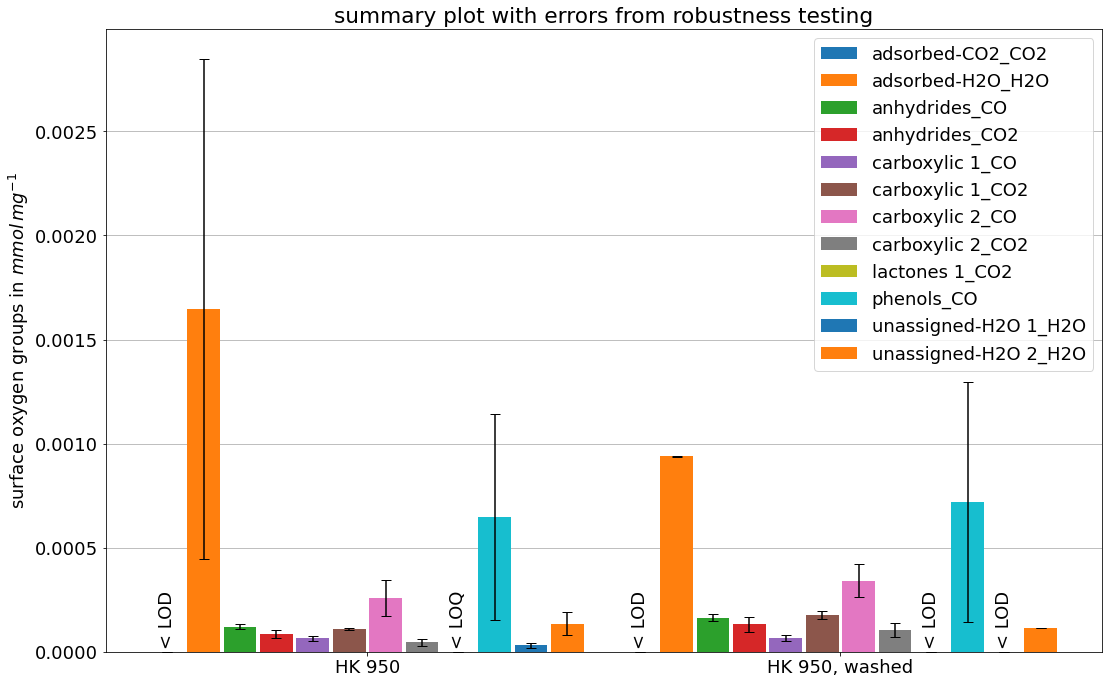

In [18]:
tir.bar_plot_results(detailed, group_by = 'samples', save = True)

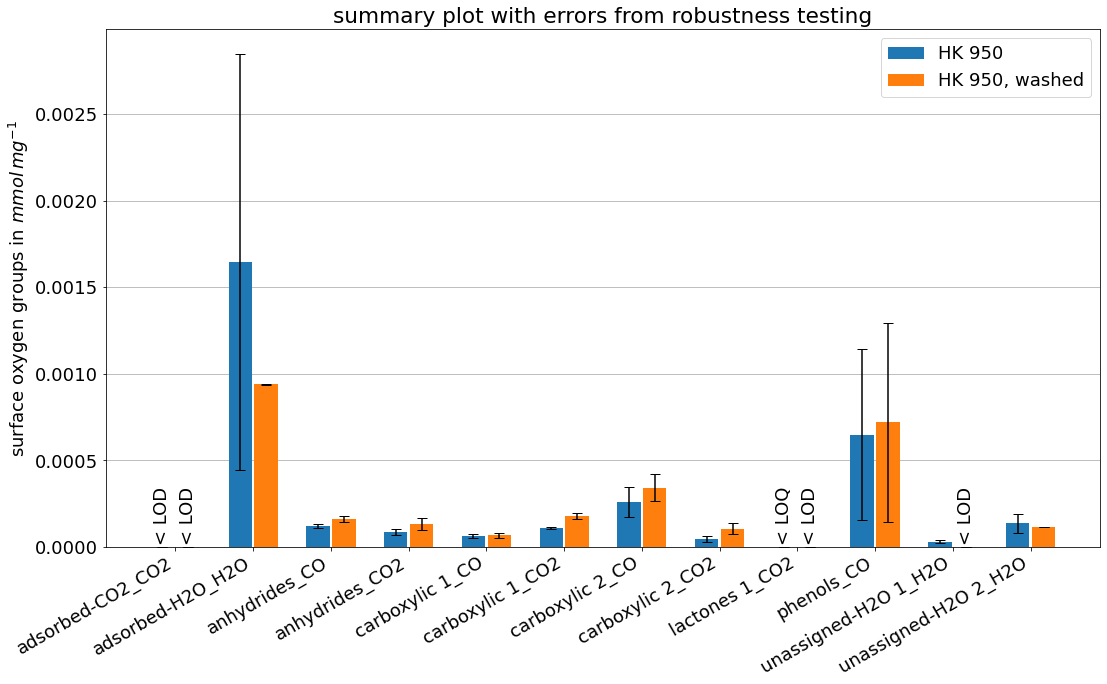

In [19]:
tir.bar_plot_results(detailed, group_by = 'groups', save = True)

### Store summarized and detailed results in dictionary

In [20]:
# results before concatenation
SOG_results['subset1_results_summarized'] = results_summarized
SOG_results['subset1_results_detailed'] = results_detailed

In [22]:
# results after concatenation
SOG_results['subset1_summarized'] = summarized
SOG_results['subset1_detailed'] = detailed

#### save SOG_results dictionary to file

In [9]:
save_dict(SOG_results, save_file_name)

## Part 3: Evaluate deconvolution results

In [34]:
# list all items in SOG_results dictionary
for i in SOG_results:
    print(i)

hk_path
hk_path_washed
hk_results_summarized
hk_results_washed_summarized
hk_results_detailed
hk_results_washed_detailes
hk_summarized
hk_detailed
hkp_path
hkp_path_washed
hkp_results_summarized
hkp_results_washed_summarized
hkp_results_detailed
hkp_results_washed_detailed
hkp_summarized
hkp_detailed
ccp_path
ccp_results_summarized
ccp_results_detailed
ccp_summarized
ccp_detailed
pf_path
pf_path_washed
pf_results_summarized
pf_results_washed_summarized
pf_results_detailed
pf_results_washed_detailed
pf_summarized
pf_detailed
az_path
az_path_washed
az_results_summarized
az_results_washed_summarized
az_results_detailed
az_results_washed_detailed
az_summarized
az_detailed
ps_path
ps_path_washed
ps_results_summarized
ps_results_washed_summarized
ps_results_detailed
ps_results_washed_detailed
ps_summarized
ps_detailed
cc_path
cc_path_washed
cc_results_summarized
cc_results_washed_summarized
cc_results_detailed
cc_results_washed_detailed
cc_summarized
cc_detailed
PAC_summmarized
ccp_path_wash

### create results DataFrame for evaluation plotting

In [33]:
subsets = ['subset1']   # list of all parts

In [35]:
# create a list with condensed results of all analyzed subsets (several times part 2)
results_summarized = [s + '_results_summarized' for s in subsets]
results_summarized

['hk_results_summarized',
 'hkp_results_summarized',
 'ccp_results_summarized',
 'pf_results_summarized',
 'az_results_summarized',
 'ps_results_summarized',
 'cc_results_summarized']

In [36]:
# create a list of dataframes called by name in results_summarized to be used tir.concatenate()
dfs = []
for i in range(len(results_summarized)):
    dfs = dfs + [SOG_results[results_summarized[i]]]

In [37]:
# concatenate selected result dataframes to plot
SOG_results['subsets_summmarized'] = tir.concatenate(dfs)
SOG_results['subsets_summmarized']

samples          HK 950                       HKP 1050                     \
            mmol_per_mg      stddev label  mmol_per_mg       stddev label   
carboxylic   0.00047751  8.7439e-05         0.00031022  2.82369e-05         
anhydrides  0.000103518  1.1634e-05        0.000103092   1.2645e-05         
lactones            NaN         NaN  n.d.          NaN          NaN  n.d.   
phenols             NaN         NaN  n.d.          NaN          NaN  n.d.   
carbonyls           NaN         NaN  n.d.          NaN          NaN  n.d.   
pyrones             NaN         NaN  n.d.          NaN          NaN  n.d.   

samples        CCP 90 D                        5000 P-f  ...         \
            mmol_per_mg       stddev label  mmol_per_mg  ...  label   
carboxylic  0.000158457  1.51717e-05        0.000220585  ...          
anhydrides  3.45069e-05  4.07247e-06        2.89197e-05  ...          
lactones     4.6735e-05  1.46324e-05                  0  ...  < LOD   
phenols     0.000210737  3.61031e-05        0.000208381  ...          
carbonyls   0.000508589   0.00014077        0.000233421  ...          
pyrones     0.000162021   2.9526e-05        0.000210981  ...          

samples         AZ 1050                       PS-WP 235                     \
            mmol_per_mg       stddev label  mmol_per_mg       stddev label   
carboxylic  0.000180319  1.28872e-05        0.000100064  8.00473e-06         
anhydrides  3.66128e-05  3.87637e-06        2.68841e-05   7.1935e-06         
lactones    4.41853e-05   5.1269e-06                NaN          NaN  n.d.   
phenols     0.000167442  2.11077e-05                NaN          NaN  n.d.   
carbonyls    0.00024526  2.62289e-05                NaN          NaN  n.d.   
pyrones     0.000191595  2.14463e-05                NaN          NaN  n.d.   

samples          CC 401                      
            mmol_per_mg       stddev  label  
carboxylic   0.00014277  8.72274e-06         
anhydrides   2.8031e-05  2.47965e-06         
lactones              0            0  < LOQ  
phenols     0.000157234  1.73807e-05         
carbonyls   0.000304754  7.77157e-05         
pyrones     0.000159283  1.37264e-05         

[6 rows x 21 columns]

#### save SOG_results dictionary to file

In [41]:
save_dict(SOG_results, save_file_name)

### Plotting for condensed results evaluation

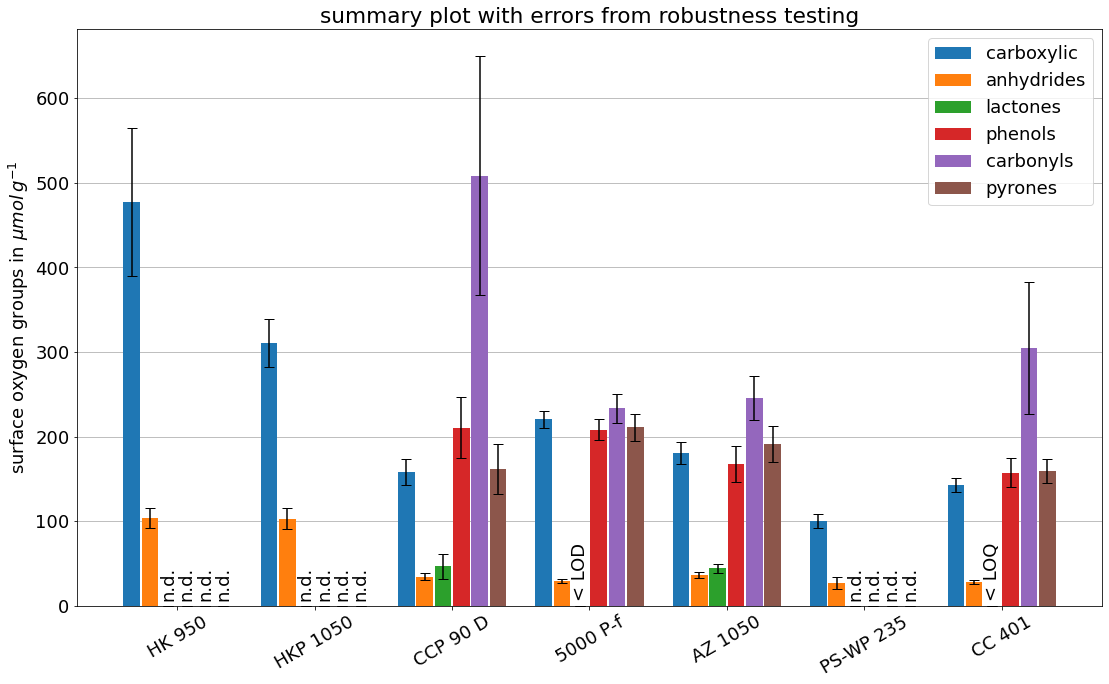

In [13]:
tir.bar_plot_results(SOG_results['subsets_summmarized'], group_by = 'samples', x_gap = 1.5, save = True)

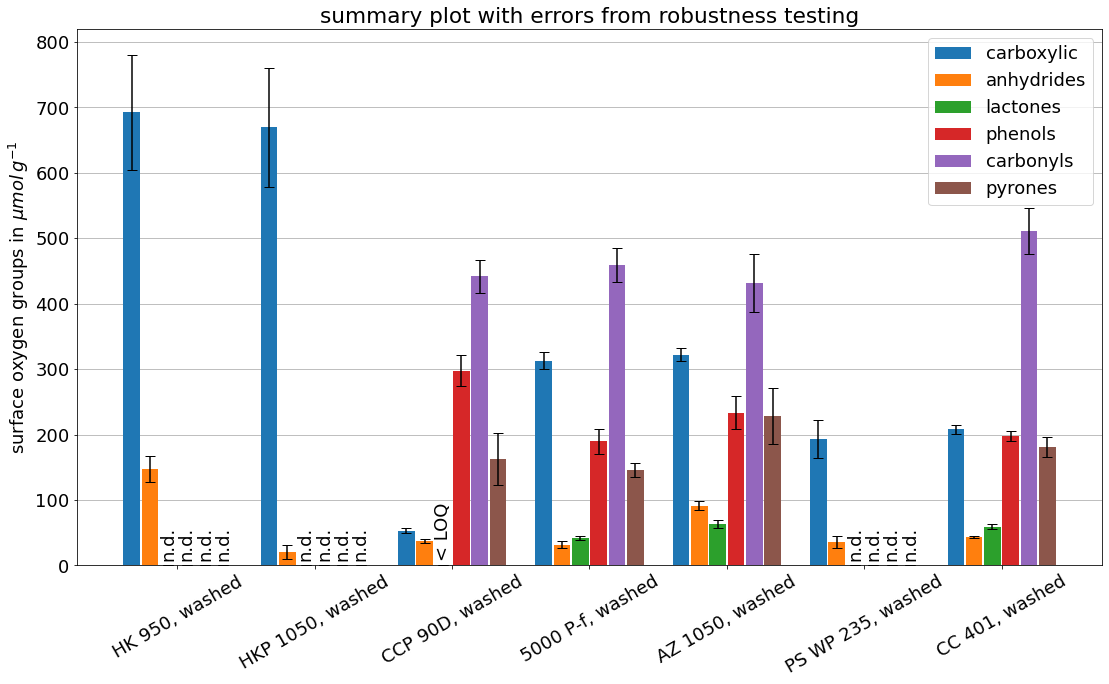

In [14]:
tir.bar_plot_results(SOG_results['subsets_summmarized'], group_by = 'groups', x_gap = 1.5, save = True)